# Time Series Visualization

Plan:
- Aggregated Trends:
	- Aggregate and plot average temperature, pressure, or other variables over time to identify general trends.
		1. In average the AirTemp is lower than 65°C which is the threshold, same the water temperature and the oil temperature
		2. PC1 and PC2 seems to follow the same trends but sometime there are big anomalies for PC2 or PC1
		In the oil pressure PC2 is often higher than PC1 
	- Consider seasonal patterns or trends across all vehicles.
		- It seems that the air temperature (PC1) rise up when the train reaches its destination station and it is normale I think when the engine is turn off the cooling system is also turn off so the heat goes up
		but Interesting fact is that when the train reaches its destination the 2 engine are not turn off.
		- For the train 191 on the date of 2023-02-03 there is a problem the train stop functioning at some point. Everything in PC1 malfunction, the temperature rise up and the oil pressure goes down. I think the engine stop working or someone shut down the engine.
		- For the same train on 2023-01-31  there was a problem with pc 1 the temperature rise and at the same time the water temp (before rising this temperature goes down) and the oil temp rise up .
		- For the same train on 2023-03-05 there was a problem at 9 am for PC1 the temperature didn't rise up but the water temperature and the oil temperature reach the threshold and at this moment the both of the temperature and the RPM go down util 11am when the RPM goes up again.
		
- Correlation Analysis:

	- Pairwise Relationships:
	- Create a correlation matrix to explore relationships between different variables (e.g., temperature, oil pressure) for all vehicles.
	- Visualize correlations using heatmaps or correlation matrices.

	- Lag Plots: lag plots to observe correlations between the variable's current value and its past values.
		- No real information can be deduce from that
		- Need to be investigated
- Anomaly Detection Visualization:

	- Threshold Visualization:
    	- Highlight instances where temperature or pressure exceeds the acceptable threshold (65°C for air, 100°C for water, 115°C for oil) using markers or different colors on the time series plots.

    - Rolling Statistics:
    	- Plot rolling mean or standard deviation to identify anomalies or sudden changes in the time series data.

- Cluster Comparison:

	- Cluster-Based Analysis:
		- Visualize how different clusters (isolation forest, mean fuzzy logic, combined) behave over time for specific variables like temperature or pressure.
        Use separate line plots or box plots for each cluster.

- Geospatial Visualization:

    - Vehicle Location Mapping:
        - If relevant, plot the geographical locations of vehicles using latitude and longitude data.
        Use scatter plots or geospatial visualizations to show the distribution of vehicles


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
import gc
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv(
    "results_norma\cluster_0_ar41_with_isolation_forest_cluster.csv",
    sep=",",
    parse_dates=True,
    index_col="timestamps_UTC",
).rename(columns={"cluster_0": "cluster"})
df = df[~df.index.year.isin([2022])]

## Aggregated Trends

### Aggregate and plot average temperature, pressure, or other variables over time to identify general trends.


In [4]:
features_list = [
    "RS_E_InAirTemp_PC1",
    "RS_E_InAirTemp_PC2",
    "RS_E_OilPress_PC1",
    "RS_E_OilPress_PC2",
    "RS_E_RPM_PC1",
    "RS_E_RPM_PC2",
    "RS_E_WatTemp_PC1",
    "RS_E_WatTemp_PC2",
    "RS_T_OilTemp_PC1",
    "RS_T_OilTemp_PC2",
    "temperature",
    "precipitation",
    "windspeed_10m",
    "sum_pollen",
]

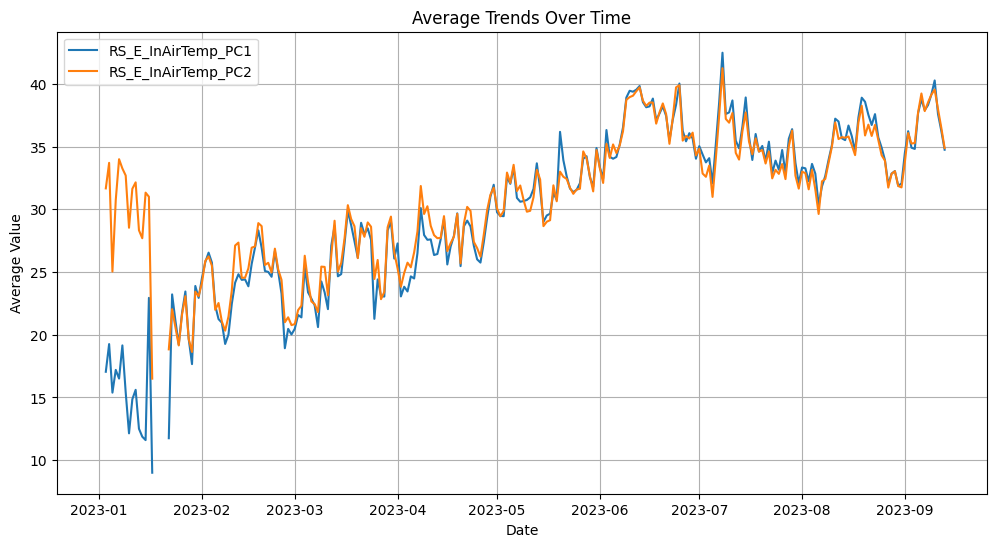

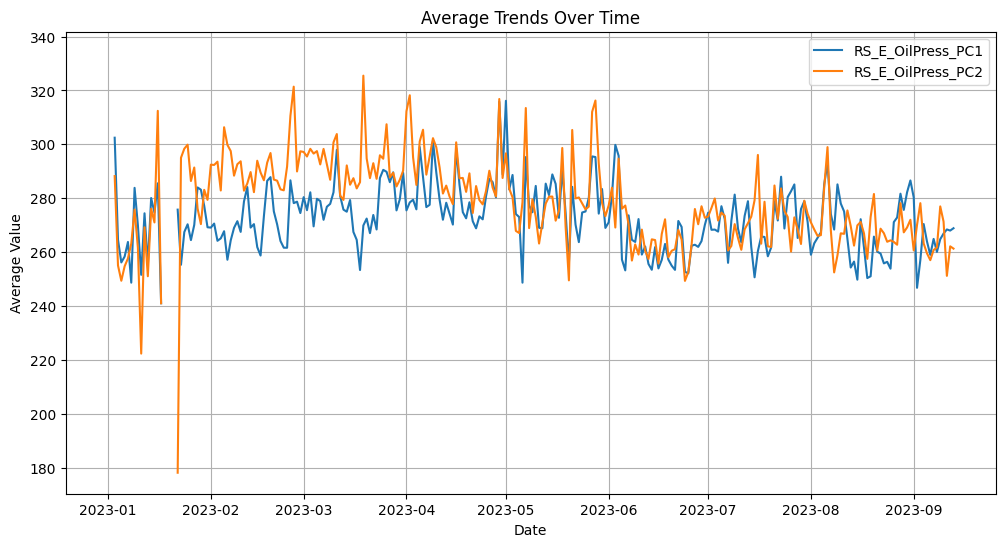

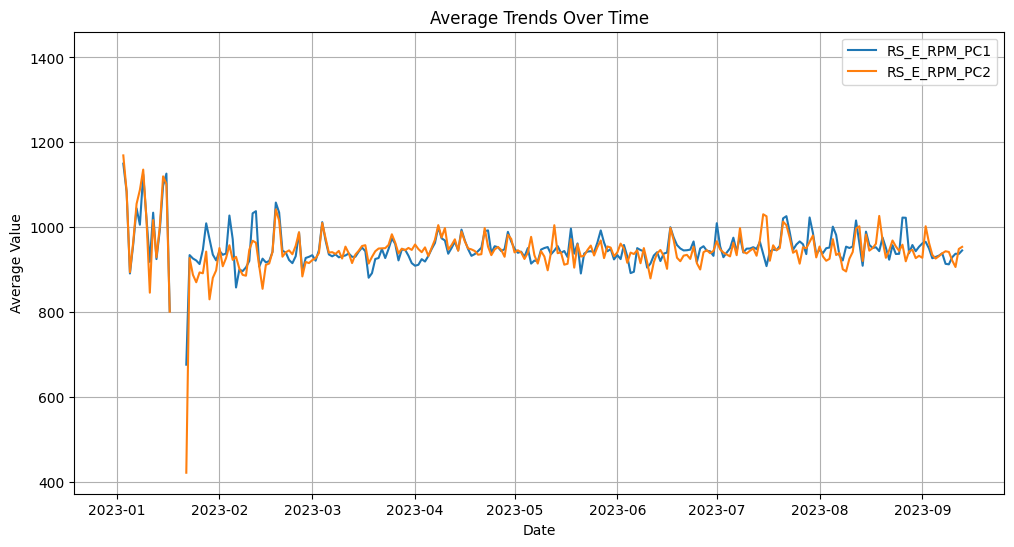

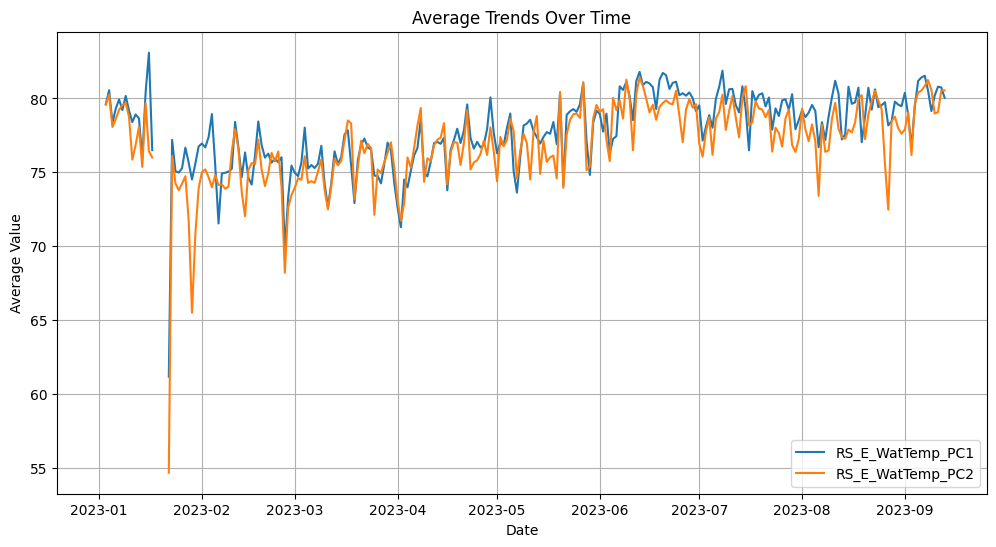

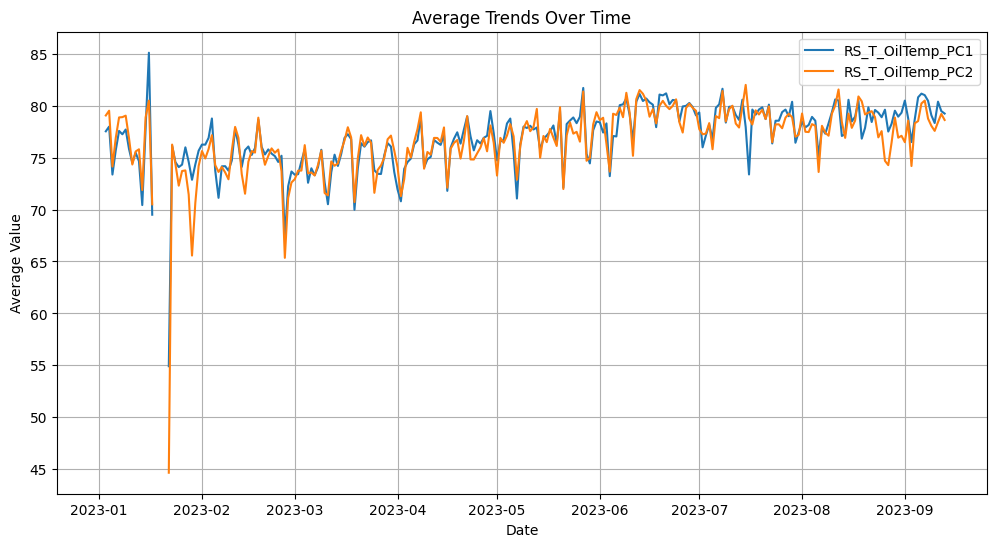

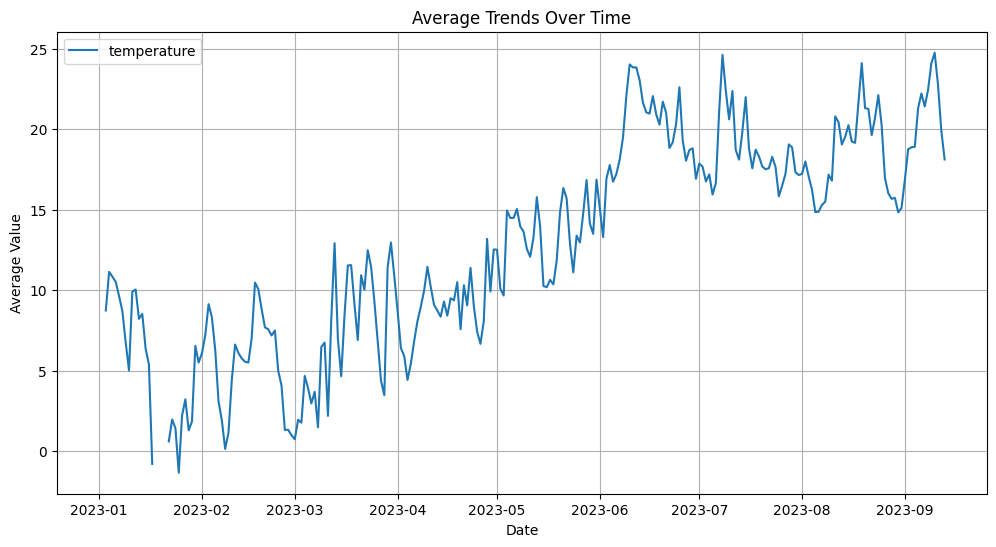

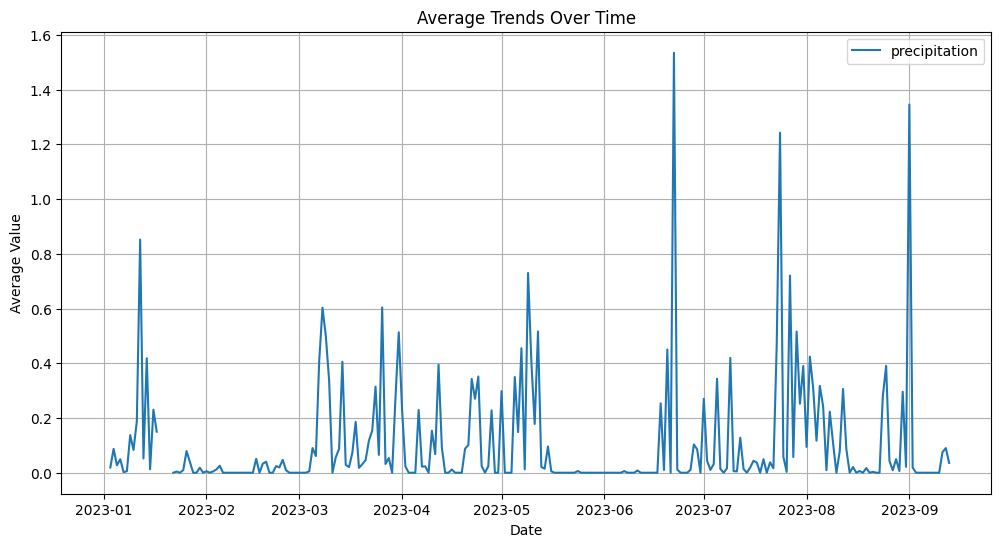

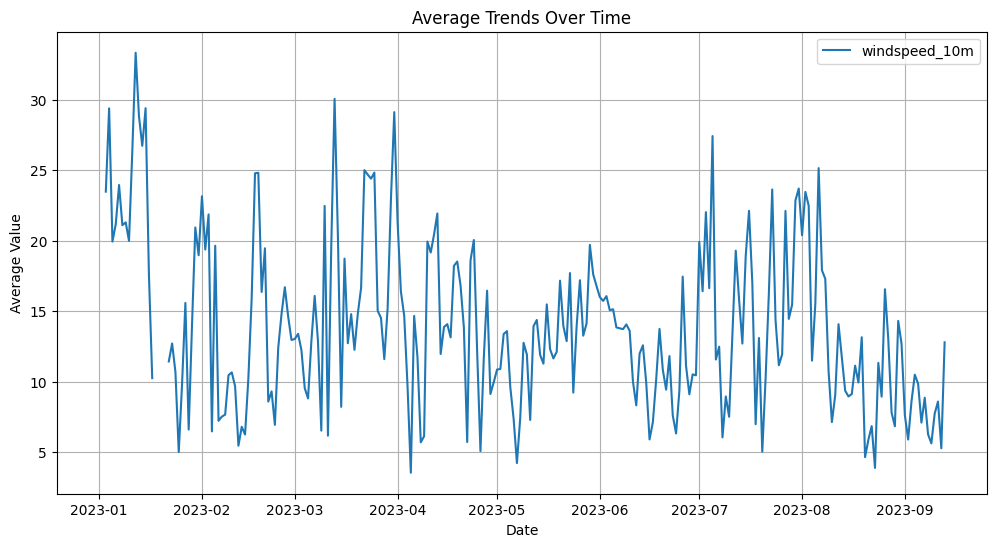

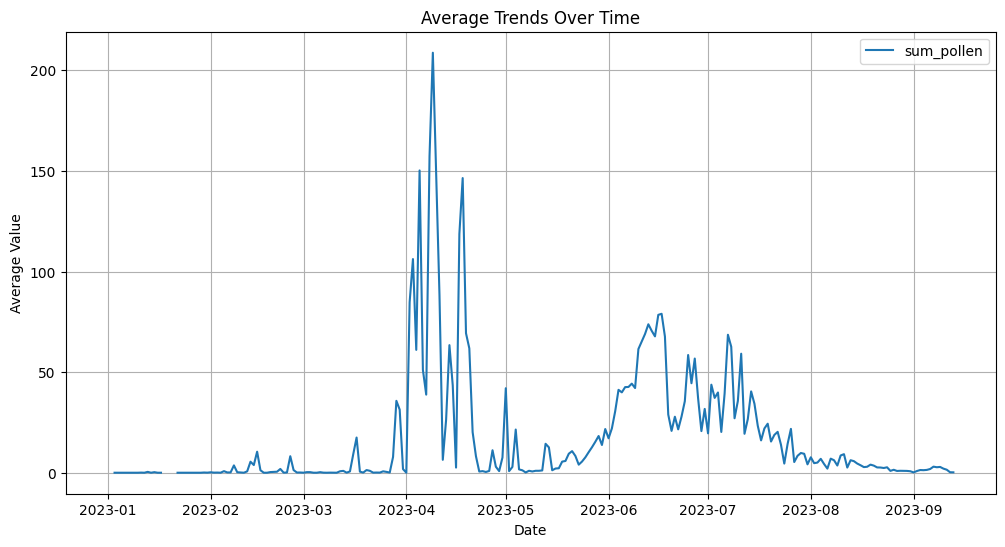

In [19]:
# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name
agg_data = df.resample("D").mean()

# Plotting aggregated data
for col in features_list:
    if col.endswith("2"):
        plt.plot(agg_data.index, agg_data[col], label=col)
        plt.title("Average Trends Over Time")
        plt.xlabel("Date")
        plt.ylabel("Average Value")
        plt.legend()
        plt.grid(True)
        plt.show()

    elif col.endswith("1"):
        plt.figure(figsize=(12, 6))
        plt.plot(agg_data.index, agg_data[col], label=col)
    else:
        plt.figure(figsize=(12, 6))

        plt.plot(agg_data.index, agg_data[col], label=col)
        plt.title("Average Trends Over Time")
        plt.xlabel("Date")
        plt.ylabel("Average Value")
        plt.legend()
        plt.grid(True)
        plt.show()

In [23]:
monthly_data

mapped_veh_id        lat       lon  RS_E_InAirTemp_PC1  \
timestamps_UTC                                                           
2023-01-31         150.606577  50.859131  4.256540           21.676653   
2023-02-28         150.350667  50.871266  4.238627           23.642711   
2023-03-31         149.737022  50.852368  4.230589           25.111795   
2023-04-30         151.087467  50.889845  4.252587           26.920980   
2023-05-31         150.674828  50.872152  4.179385           31.357911   
2023-06-30         150.952537  50.869876  4.159875           36.654701   
2023-07-31         151.609316  50.879580  4.327851           35.192021   
2023-08-31         152.406260  50.906127  4.267088           34.397553   
2023-09-30         150.316271  50.865465  4.169656           36.823821   

                RS_E_InAirTemp_PC2  RS_E_OilPress_PC1  RS_E_OilPress_PC2  \
timestamps_UTC                                                             
2023-01-31               21.504195         270.248071         288.032416   
2023-02-28               24.315565         269.327946         291.510287   
2023-03-31               25.572986         277.552510         291.548565   
2023-04-30               27.684200         280.163710         288.448813   
2023-05-31               31.205548         277.902122         277.487527   
2023-06-30               36.683565         263.114368         267.058120   
2023-07-31               34.535306         270.334785         270.992678   
2023-08-31               33.991723         268.656019         267.883543   
2023-09-30               36.926317         265.824273         261.807240   

                RS_E_RPM_PC1  RS_E_RPM_PC2  RS_E_WatTemp_PC1  \
timestamps_UTC                                                 
2023-01-31        935.611452    889.649220         75.758878   
2023-02-28        932.535038    926.523620         75.460606   
2023-03-31        937.013477    944.522662         75.840961   
2023-04-30        948.943282    952.214739         76.491566   
2023-05-31        942.834285    936.559398         77.947391   
2023-06-30        938.823128    934.412980         80.190592   
2023-07-31        957.048983    952.730366         79.509999   
2023-08-31        952.422360    941.833759         79.253731   
2023-09-30        936.601274    938.258271         80.370080   

                RS_E_WatTemp_PC2  RS_T_OilTemp_PC1  RS_T_OilTemp_PC2  \
timestamps_UTC                                                         
2023-01-31             73.187949         74.785625         72.814830   
2023-02-28             74.640292         74.882765         74.409797   
2023-03-31             75.550434         74.766160         74.996818   
2023-04-30             76.211753         76.091945         75.827076   
2023-05-31             77.233659         77.489241         77.226258   
2023-06-30             79.527545         79.645616         79.558554   
2023-07-31             78.379021         78.805348         78.600081   
2023-08-31             78.103894         78.702497         77.996053   
2023-09-30             79.864615         79.866091         78.519221   

                temperature  precipitation  windspeed_10m  sum_pollen  \
timestamps_UTC                                                          
2023-01-31         2.658794       0.020227      13.048295    0.018119   
2023-02-28         5.296002       0.008171      12.885944    1.421891   
2023-03-31         6.816196       0.163309      16.281910    4.154259   
2023-04-30         8.611027       0.087470      14.160066   55.122918   
2023-05-31        12.890649       0.108400      12.907298    6.884787   
2023-06-30        19.570387       0.095934      11.787324   43.847347   
2023-07-31        18.436803       0.164739      15.365684   25.961707   
2023-08-31        17.988583       0.113692      12.172543    3.751126   
2023-09-30        20.581666       0.139190       8.331112    1.410292   

                 cluster  Month  
timestamps_UTC              

In [27]:
monthly_data.index.month

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='timestamps_UTC')

In [ ]:
agg_data_per_vehicle = df.groupby("mapped_veh_id").resample("D").mean()
agg_data_per_vehicle = agg_data_per_vehicle.drop(["mapped_veh_id"], axis=1)
agg_data_per_vehicle

<Figure size 1200x1500 with 0 Axes>

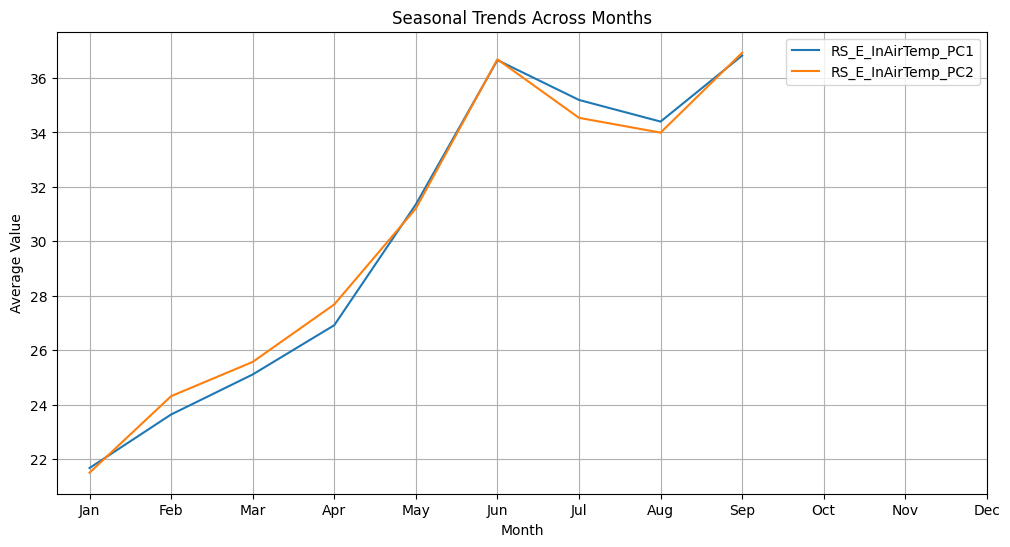

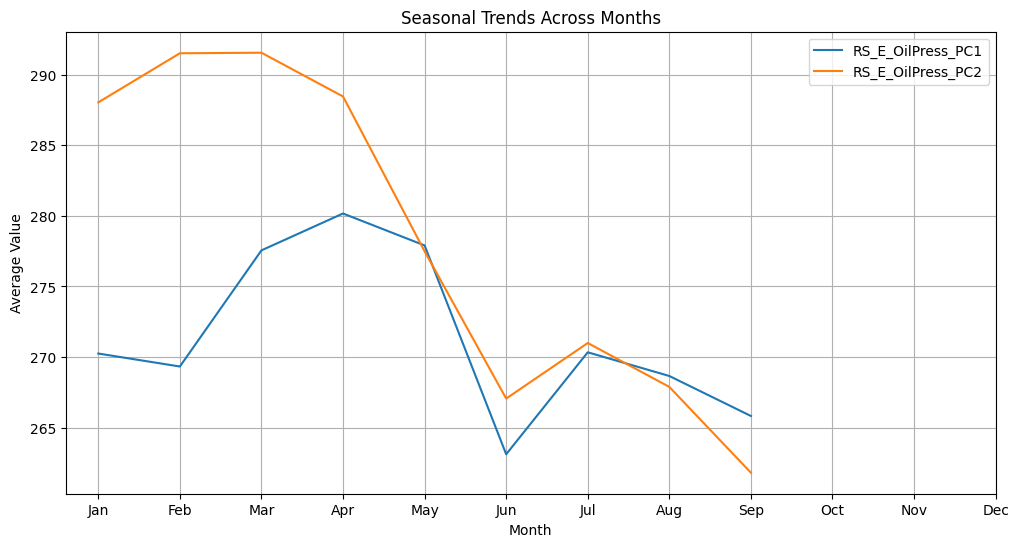

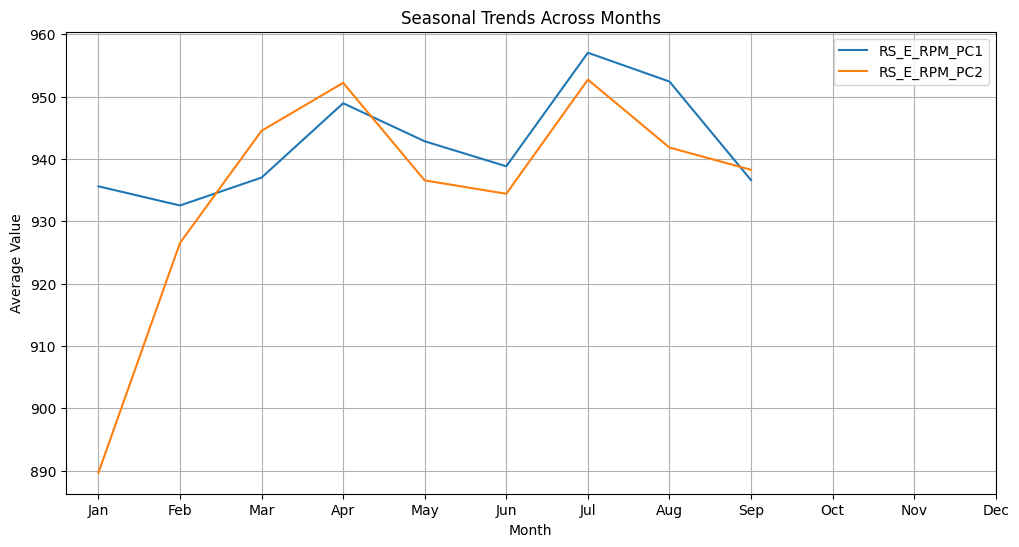

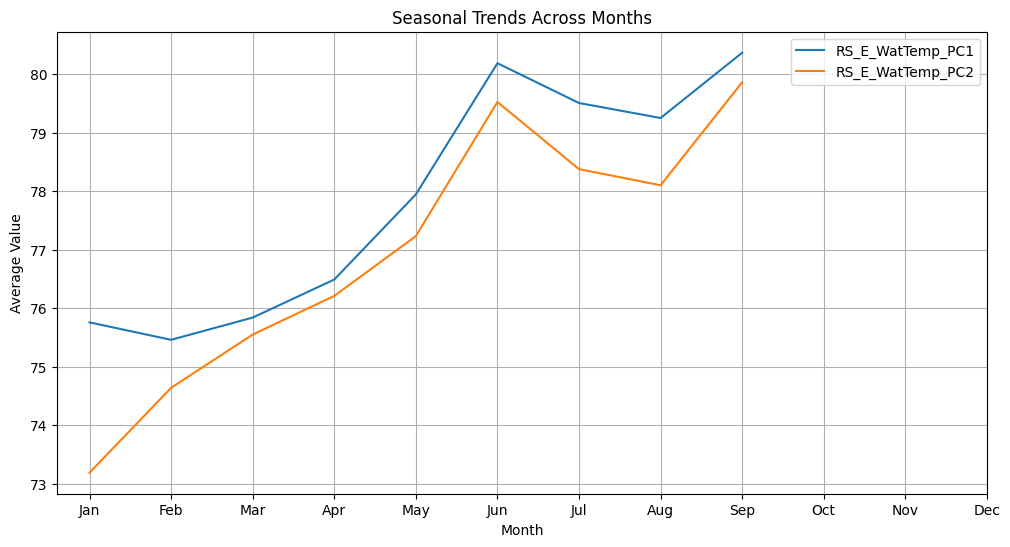

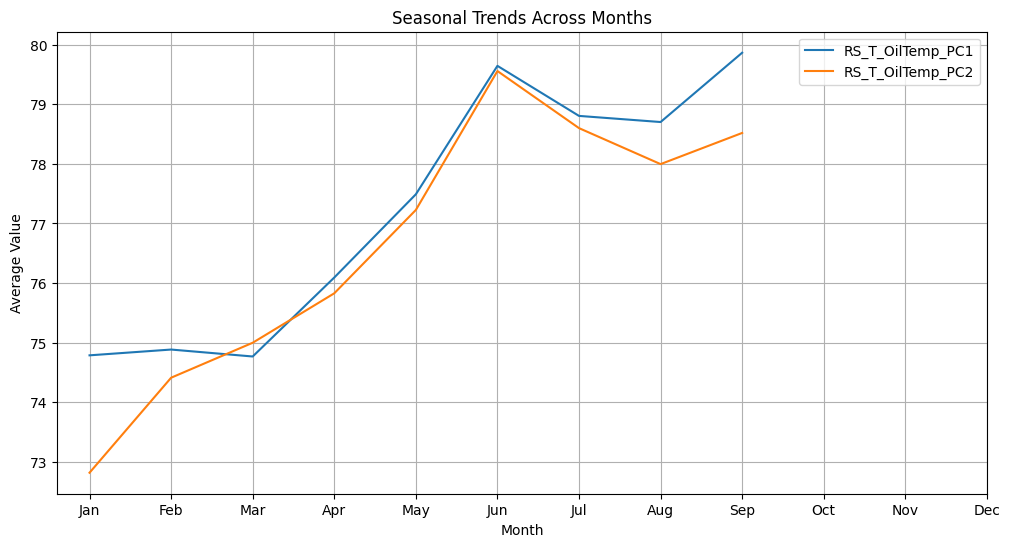

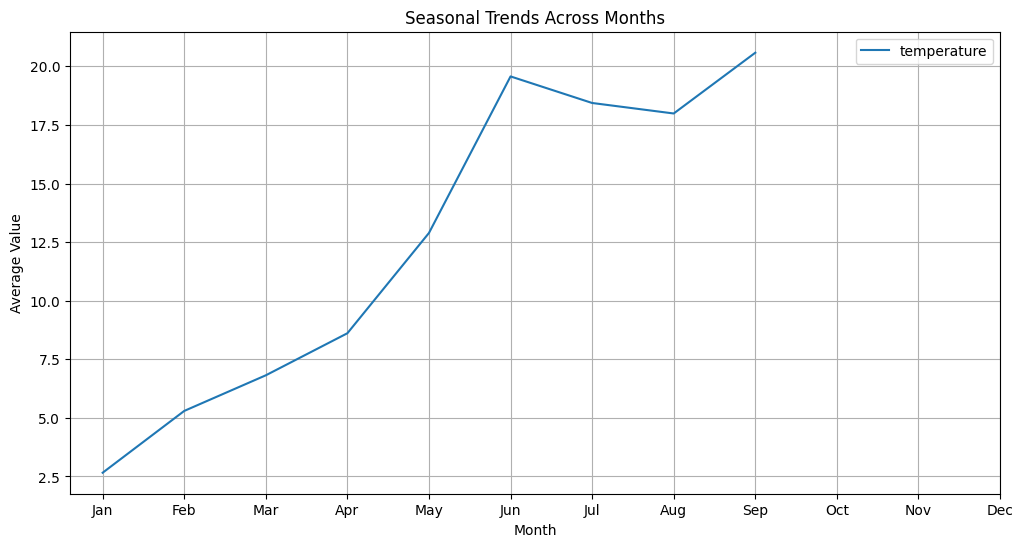

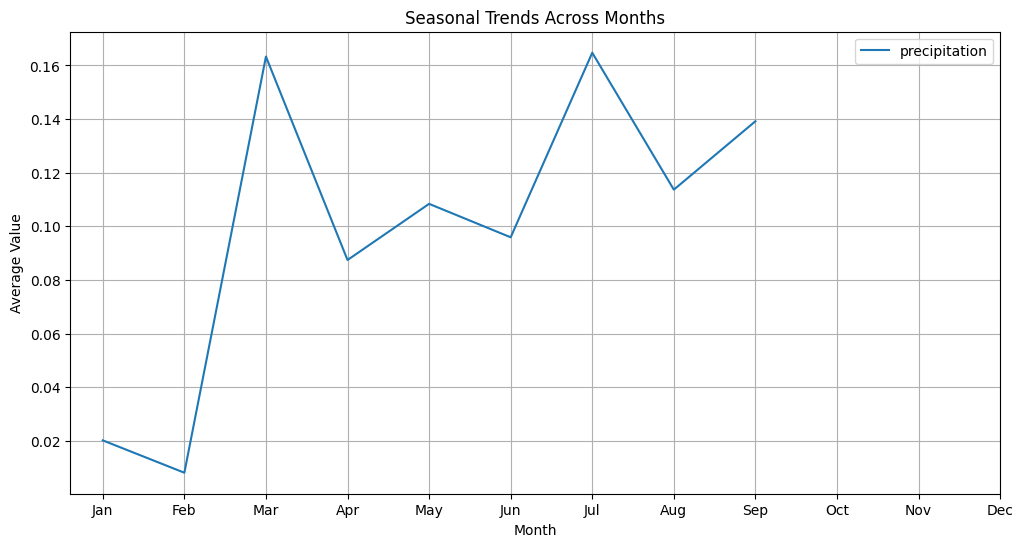

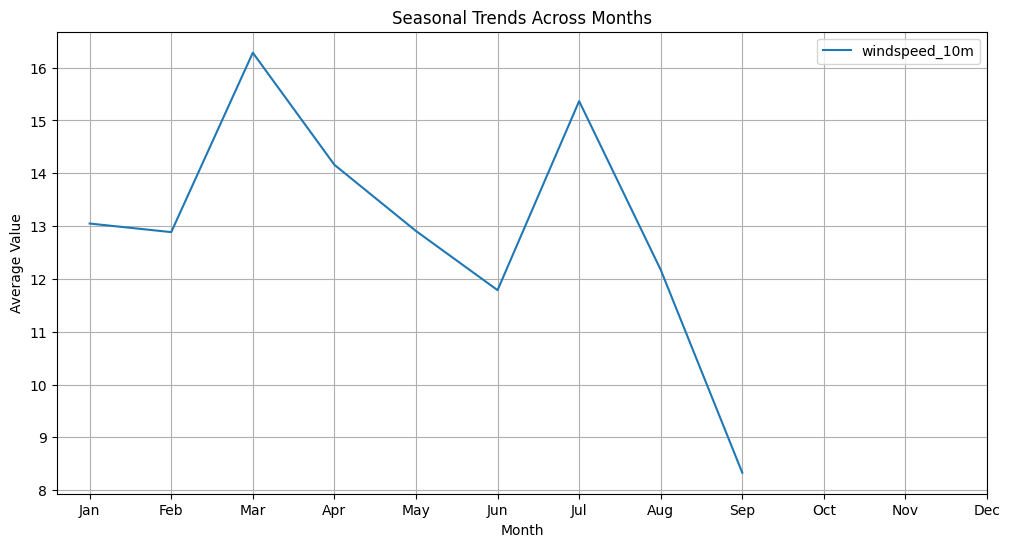

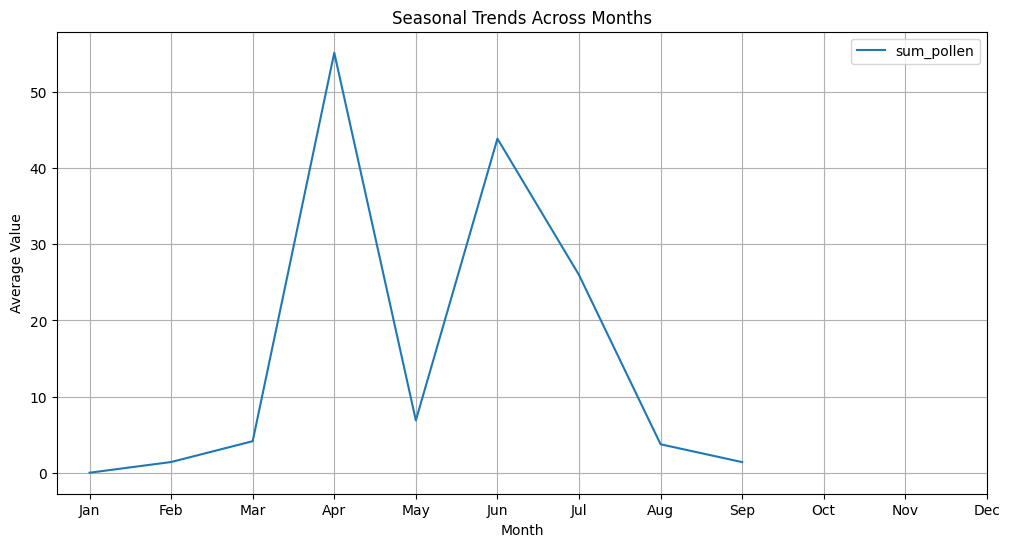

In [28]:
# Assuming your dataframe is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Resample data to monthly and calculate mean
monthly_data = df.resample("M").mean()

# Extract the month from the index
monthly_data["Month"] = monthly_data.index.month

# Plotting seasonal trends for each variable
plt.figure(figsize=(12, 15))
for col in features_list:
    if col.endswith("2"):
        plt.plot(monthly_data.index.month, monthly_data[col], label=col)
        plt.title("Seasonal Trends Across Months")
        plt.xlabel("Month")
        plt.ylabel("Average Value")
        plt.legend()
        plt.grid(True)
        plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
        plt.show()

    elif col.endswith("1"):
        plt.figure(figsize=(12, 6))
        plt.plot(monthly_data.index.month, monthly_data[col], label=col)
    else:
        plt.figure(figsize=(12, 6))

        plt.plot(monthly_data.index.month, monthly_data[col], label=col)
        plt.title("Seasonal Trends Across Months")
        plt.xlabel("Month")
        plt.ylabel("Average Value")
        plt.legend()
        plt.grid(True)
        plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
        plt.show()




### Consider seasonal patterns or trends across all vehicles.

In [271]:
air_threshold = 65
water_threshold = 100
oil_threshold = 115
exceeded_thresholds = df[
    # (df["RS_E_InAirTemp_PC1"] > air_threshold)
     (df["RS_E_WatTemp_PC1"] > water_threshold)
    & (df["RS_T_OilTemp_PC1"] > oil_threshold)
]

# Select 5 vehicles that exceed all thresholds
vehicles_above_thresholds = exceeded_thresholds["mapped_veh_id"].unique()
print(vehicles_above_thresholds, "size: ",len(vehicles_above_thresholds))

[191. 142.] size:  2


In [272]:
days_intervale_vehicles_above_thresholds = {
    vehicle: (
        exceeded_thresholds[exceeded_thresholds["mapped_veh_id"] == vehicle].index.min(),
        exceeded_thresholds[exceeded_thresholds["mapped_veh_id"] == vehicle].index.max(),
    )
    for vehicle in vehicles_above_thresholds
}

In [273]:
dict(sorted(days_intervale_vehicles_above_thresholds.items(), key=lambda item: (item[1][0], item[1][1]) ) )

{191.0: (Timestamp('2023-01-31 17:23:56'), Timestamp('2023-03-05 04:54:59')),
 142.0: (Timestamp('2023-06-09 16:36:03'), Timestamp('2023-07-17 10:35:16'))}

In [276]:
day_per_vehicle = df.loc["2023-01-01":"2023-03-31"]
day_per_vehicle = (
    day_per_vehicle[
        (
            # (day_per_vehicle["RS_E_InAirTemp_PC1"] > air_threshold)
            (day_per_vehicle["RS_E_WatTemp_PC1"] > water_threshold)
            | (day_per_vehicle["RS_T_OilTemp_PC1"] > oil_threshold)
        )
        & (day_per_vehicle["mapped_veh_id"] == 191)
    ]
    .index.to_period("D")
    .unique()
)
print(day_per_vehicle.empty)

C:\Users\Django\AppData\Local\Temp\ipykernel_7368\216164625.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  day_per_vehicle = df.loc["2023-01-01":"2023-03-31"]


False


[191. 142.]


C:\Users\Django\AppData\Local\Temp\ipykernel_7368\257973478.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  day_per_vehicle = df.loc["2023-01-01":"2023-07-31"]


<class 'pandas.core.indexes.period.PeriodIndex'>
False


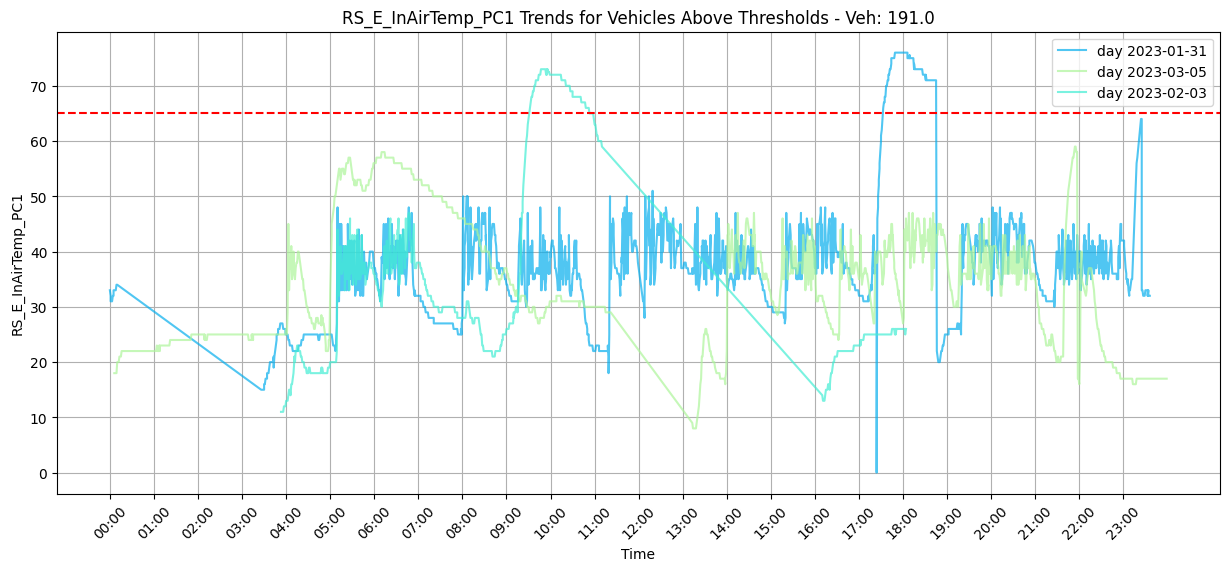

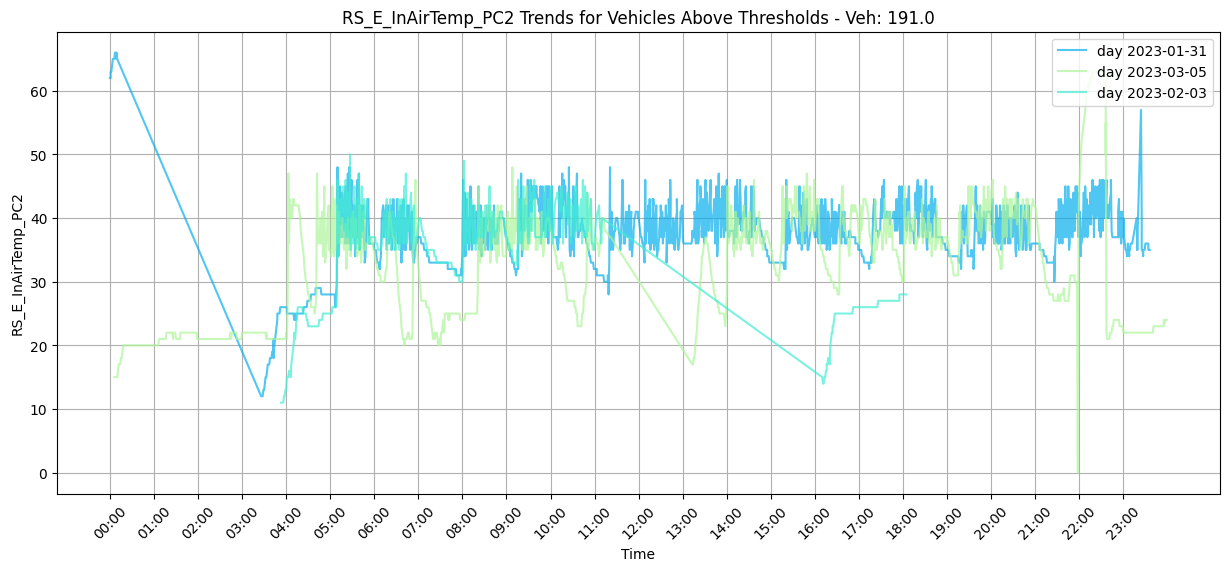

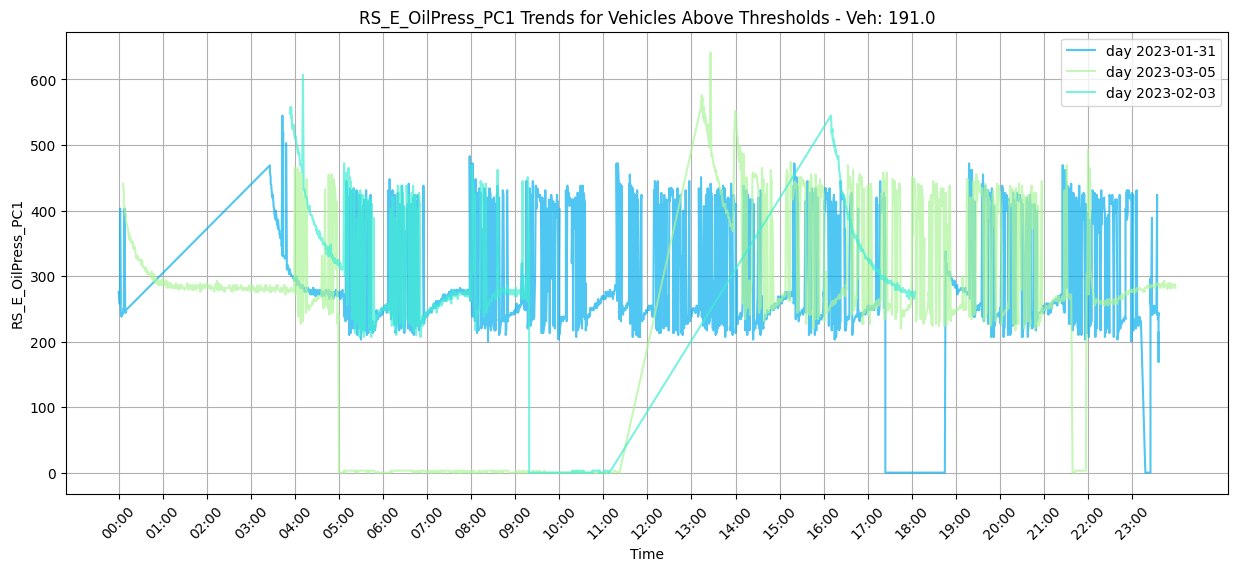

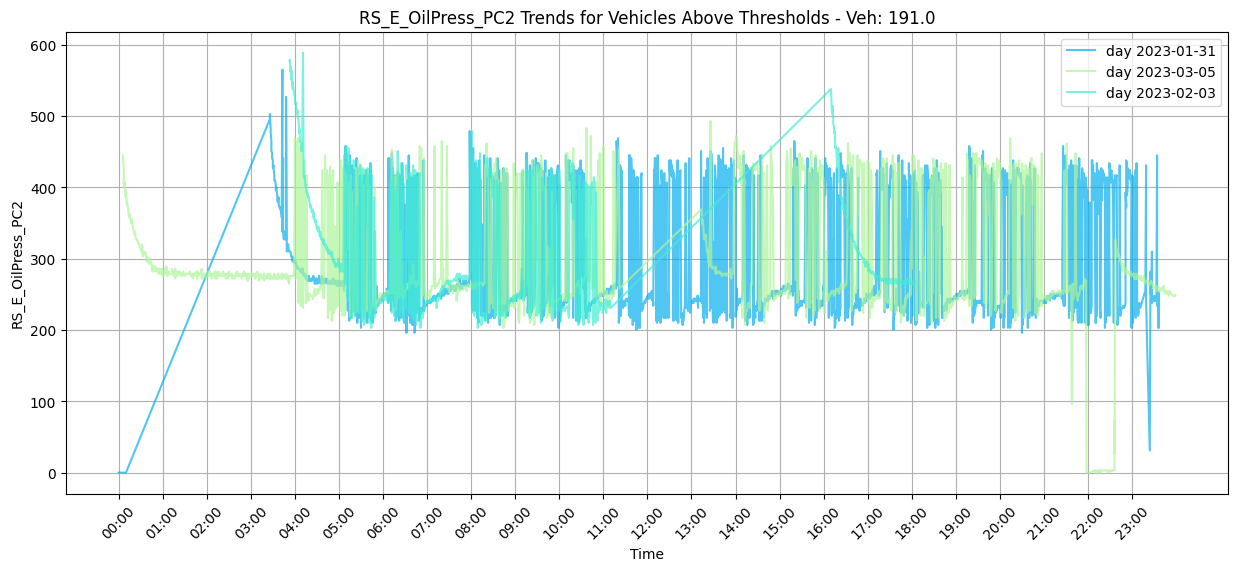

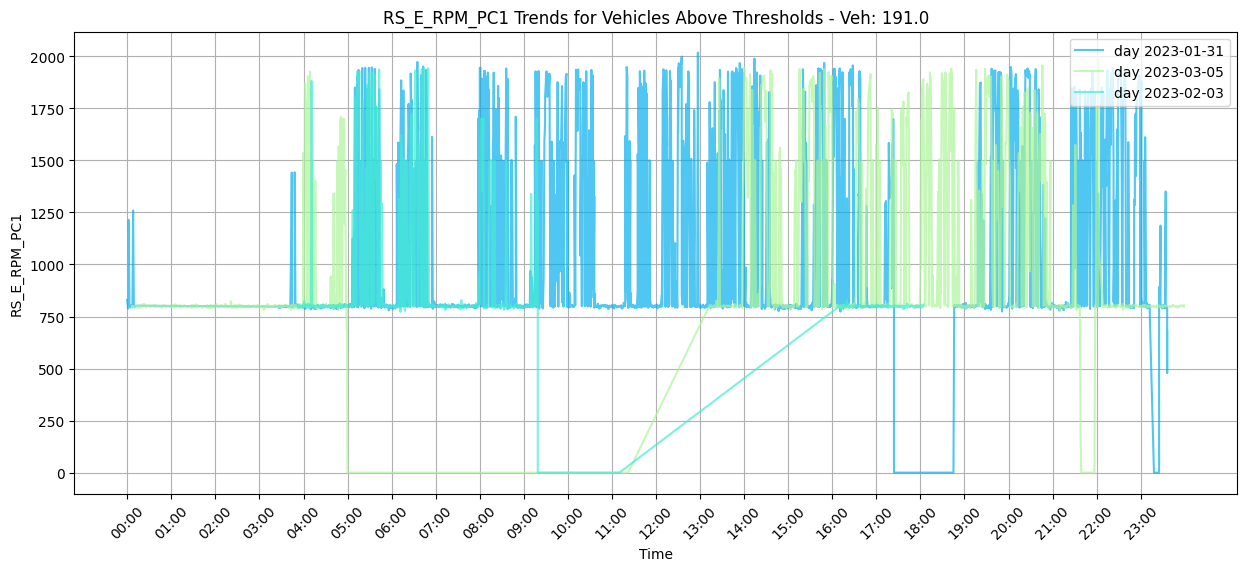

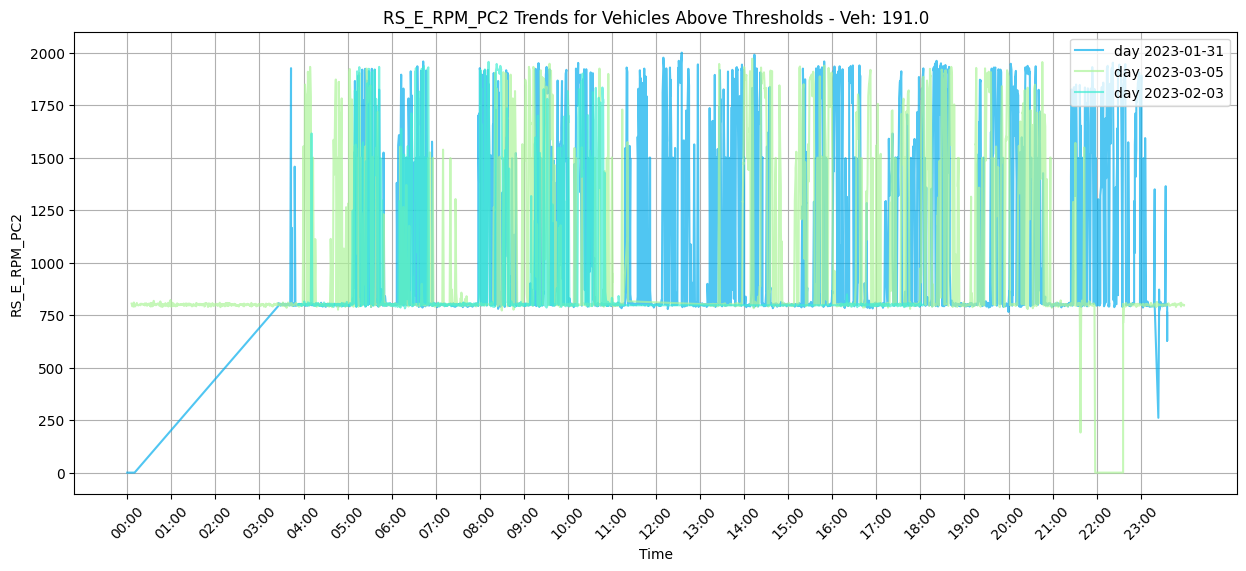

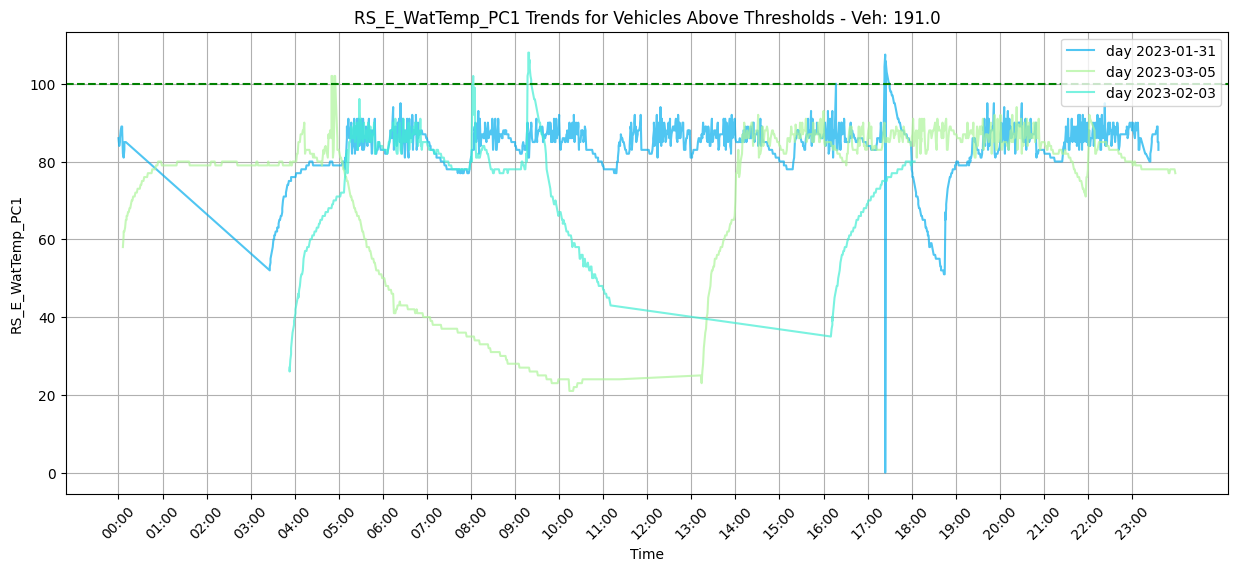

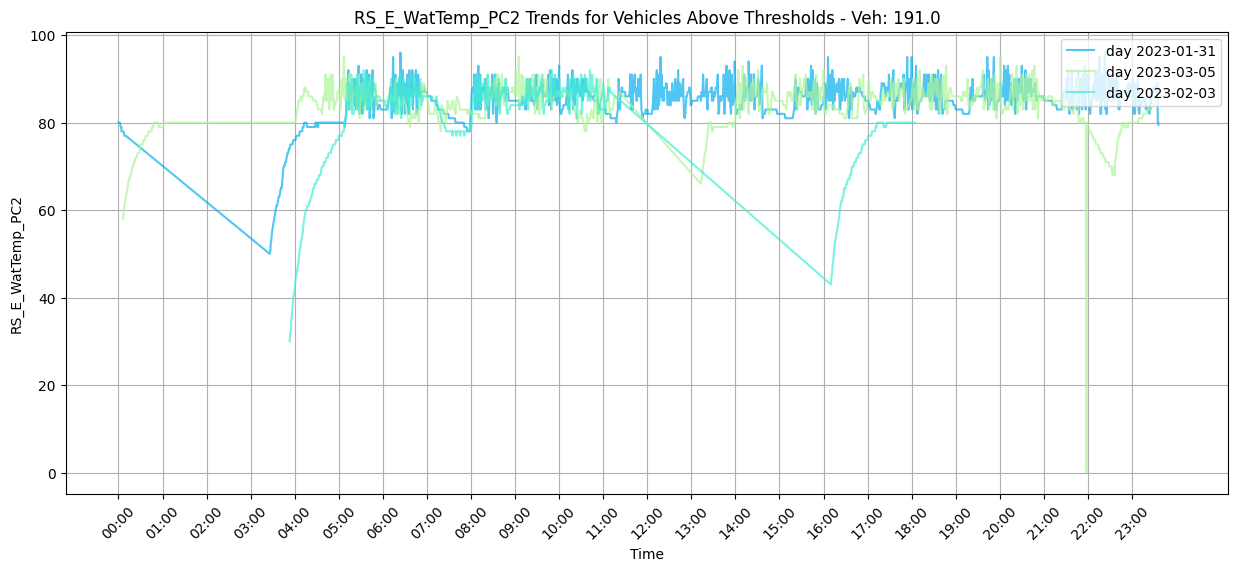

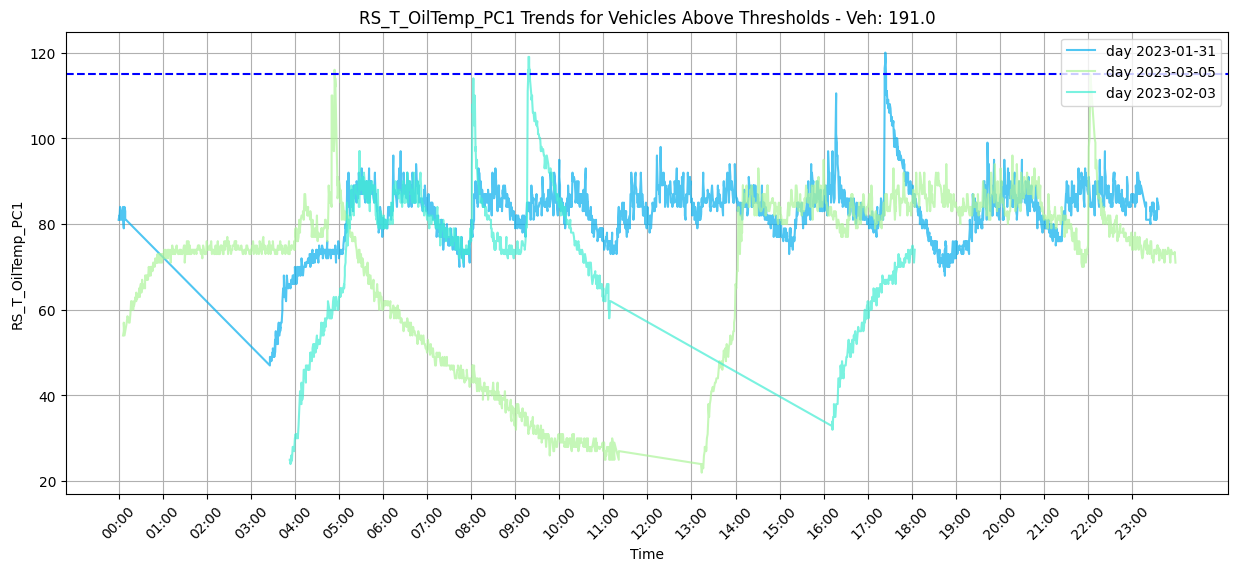

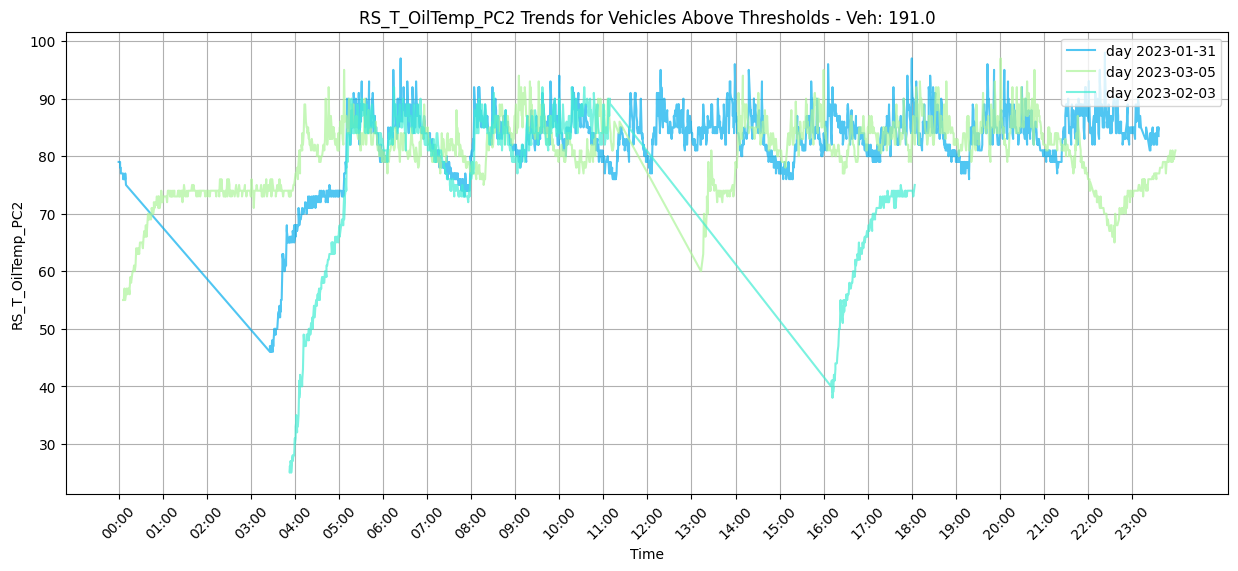

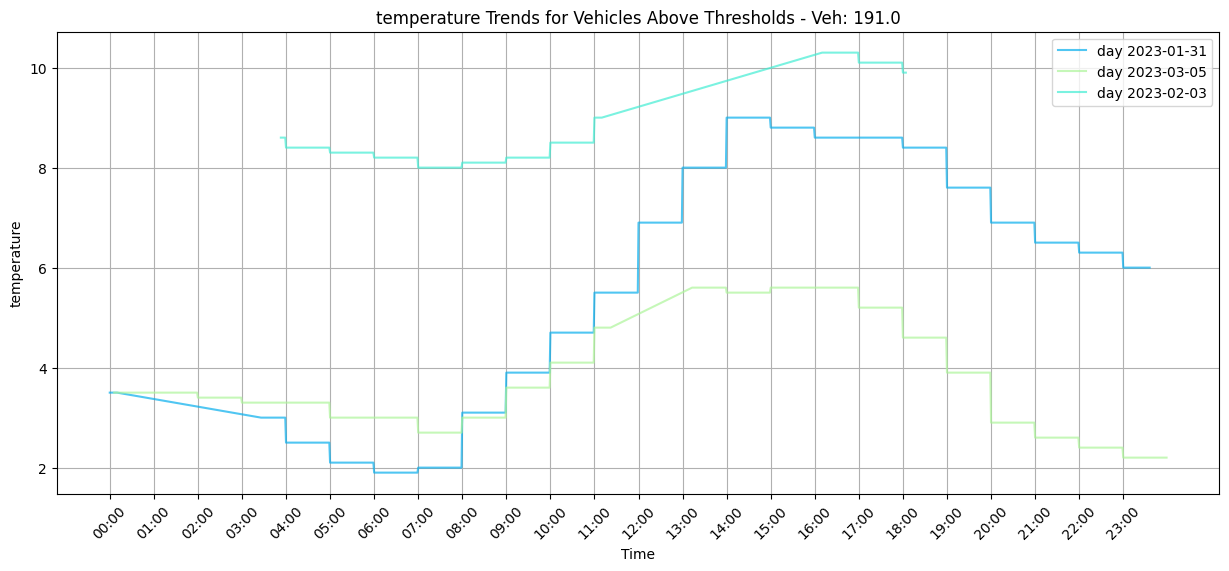

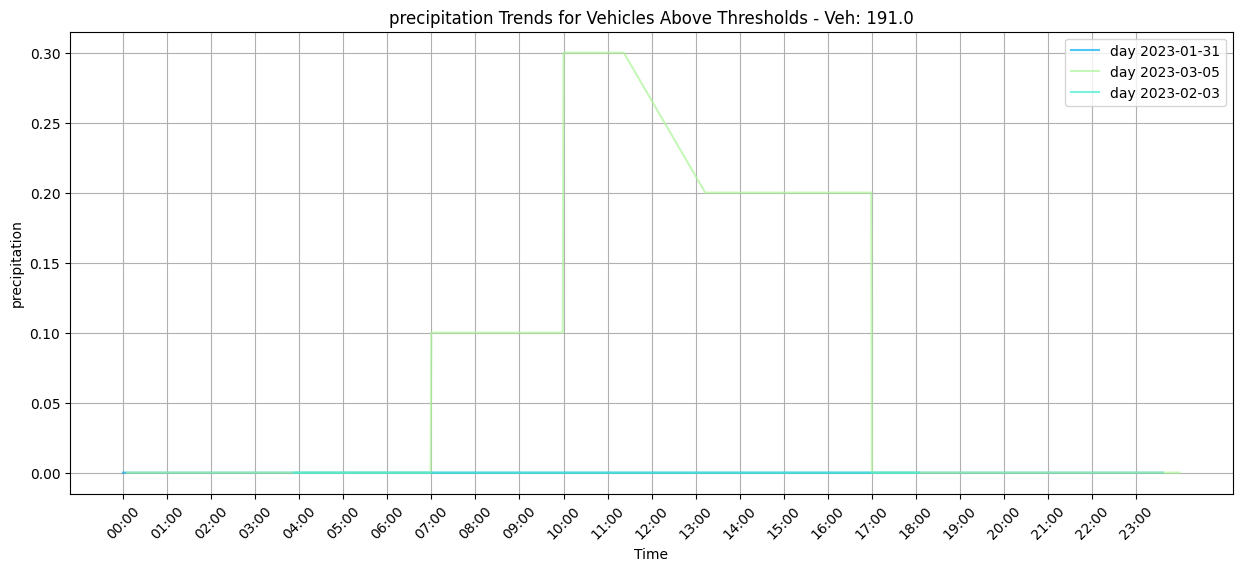

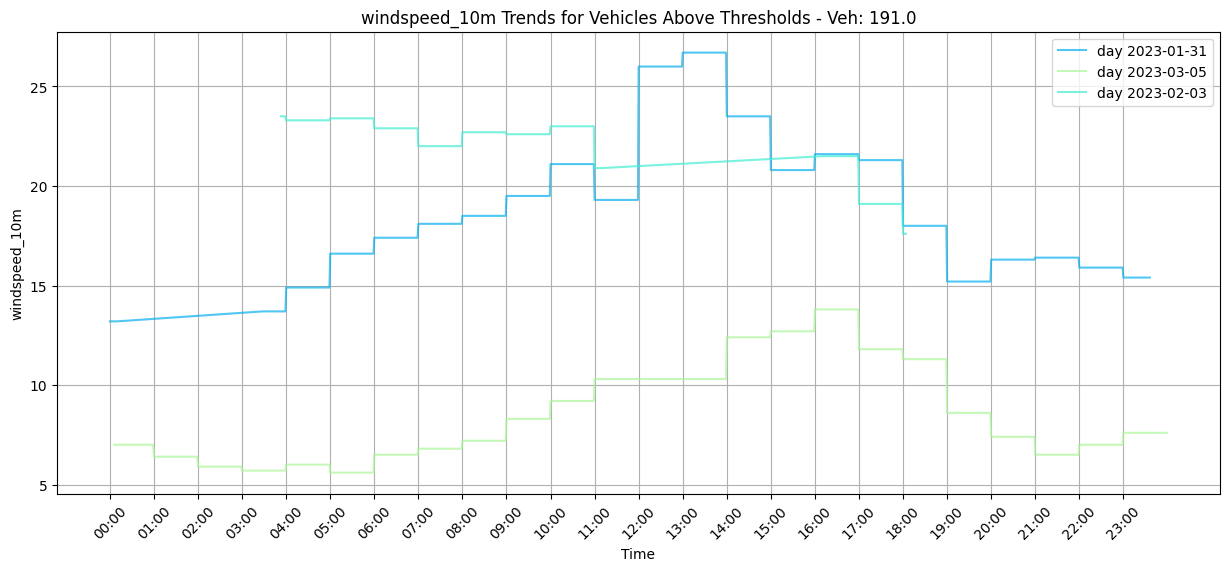

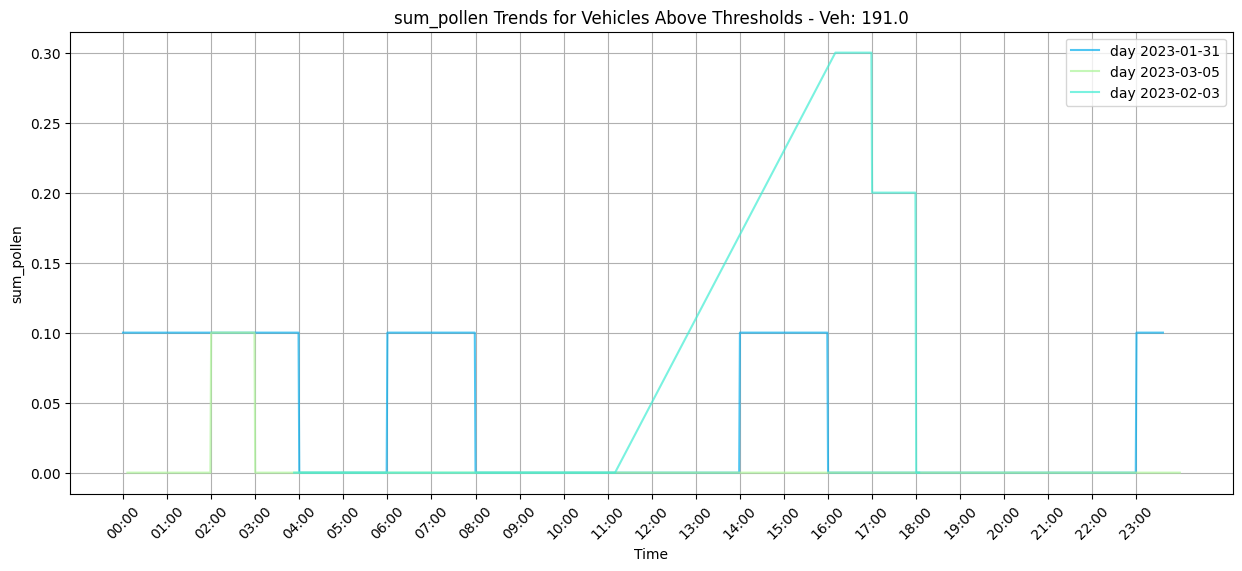

<class 'pandas.core.indexes.period.PeriodIndex'>
False


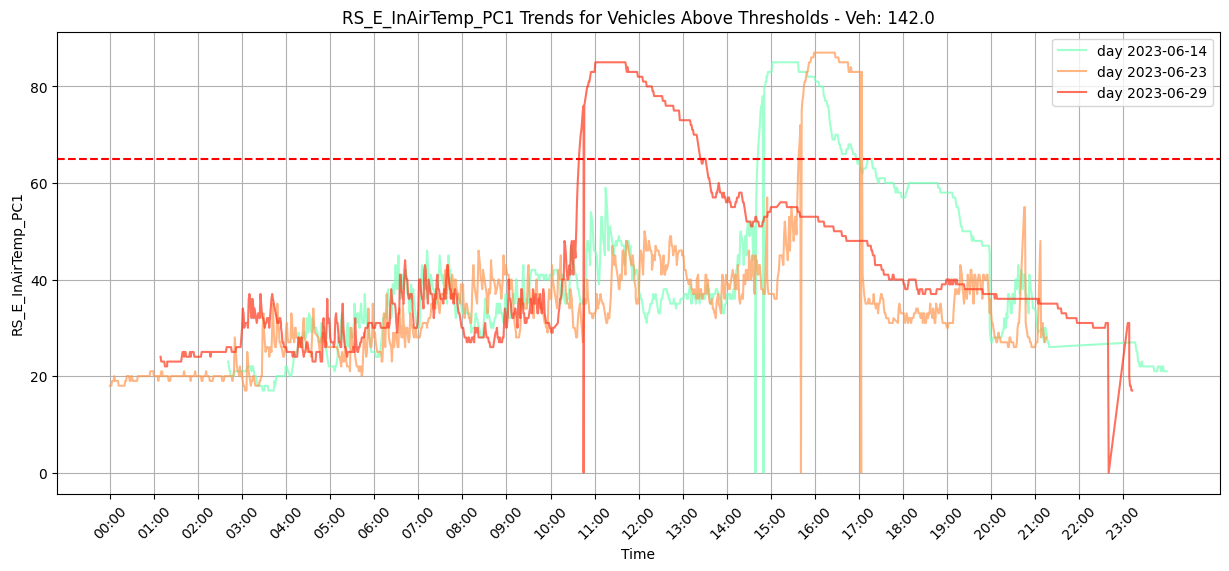

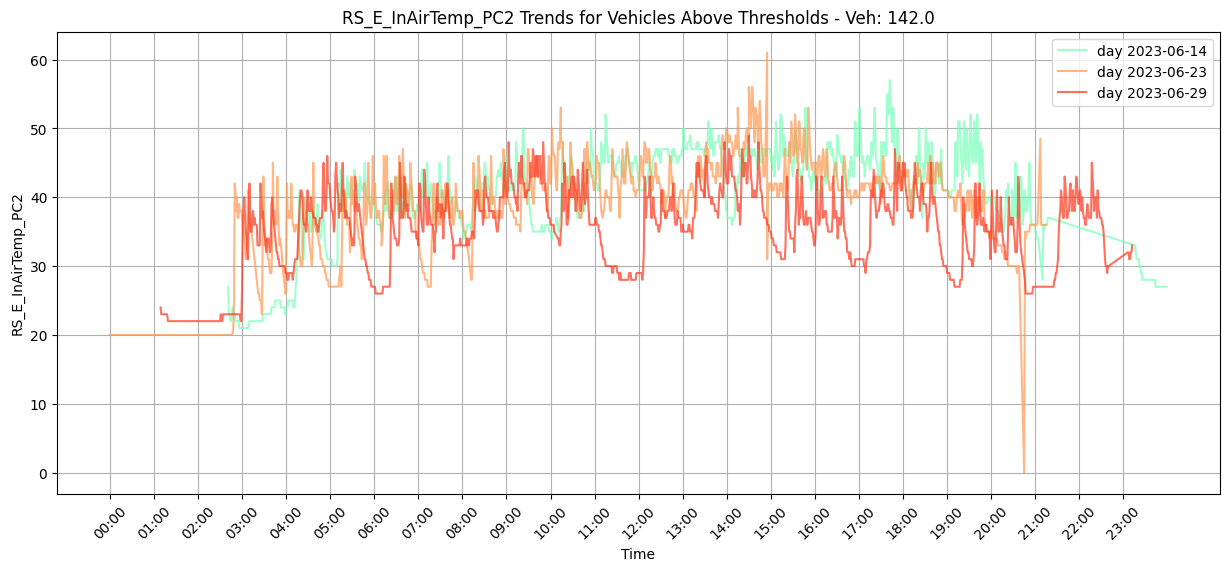

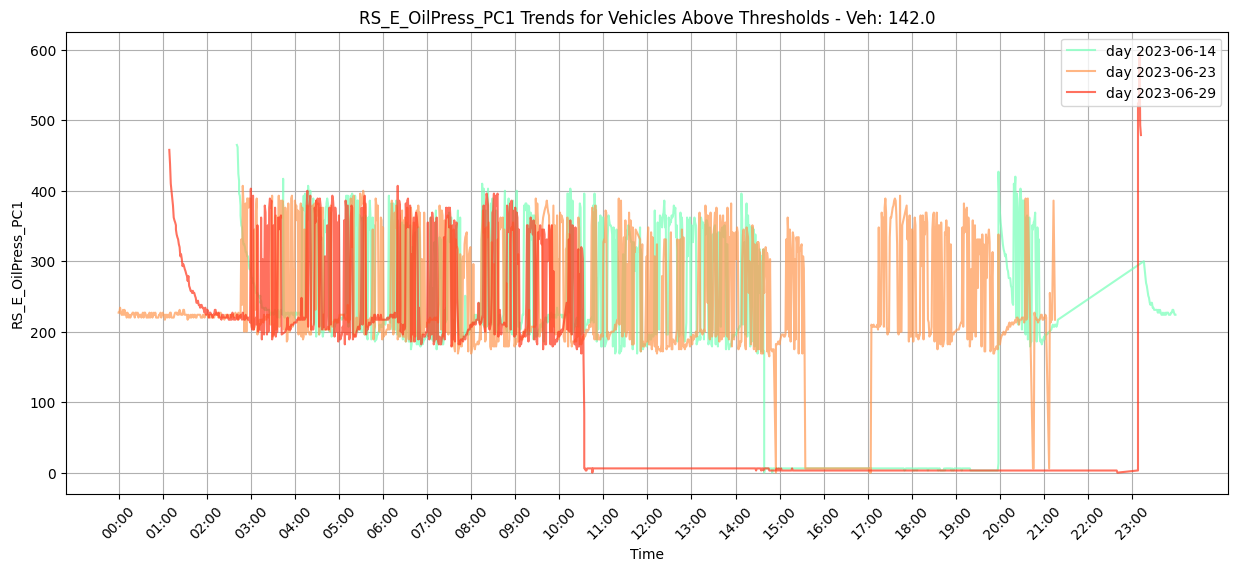

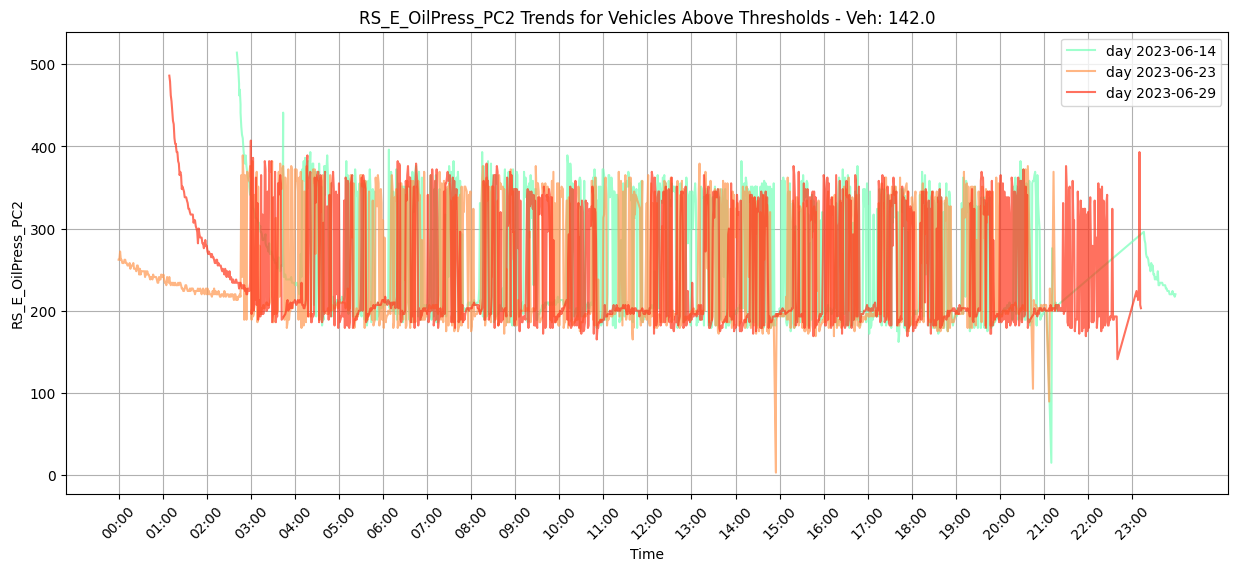

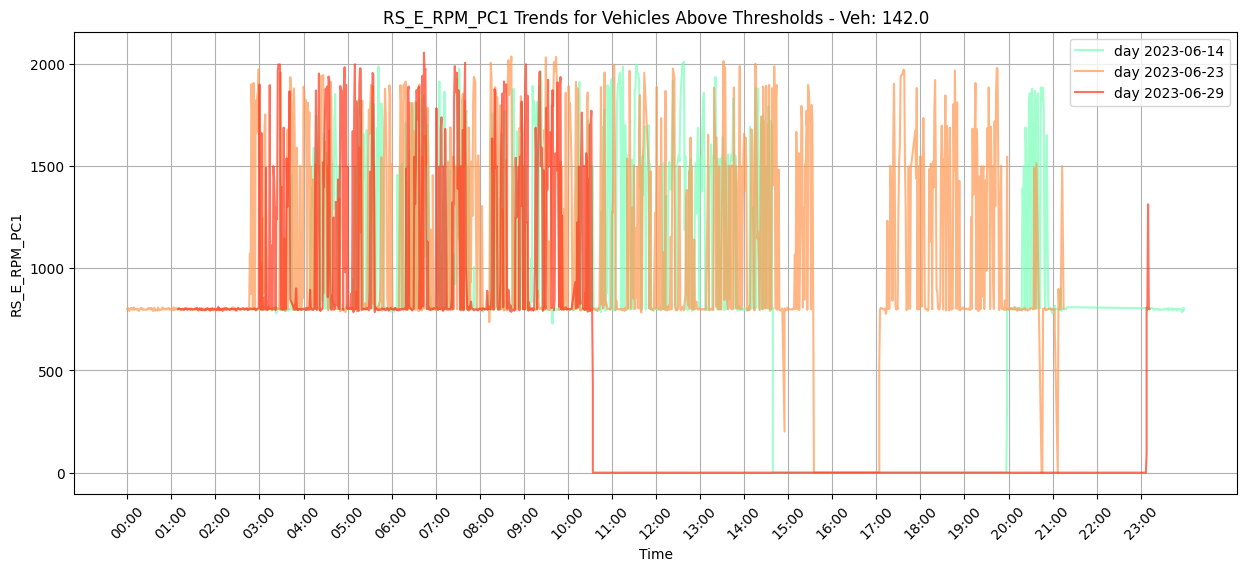

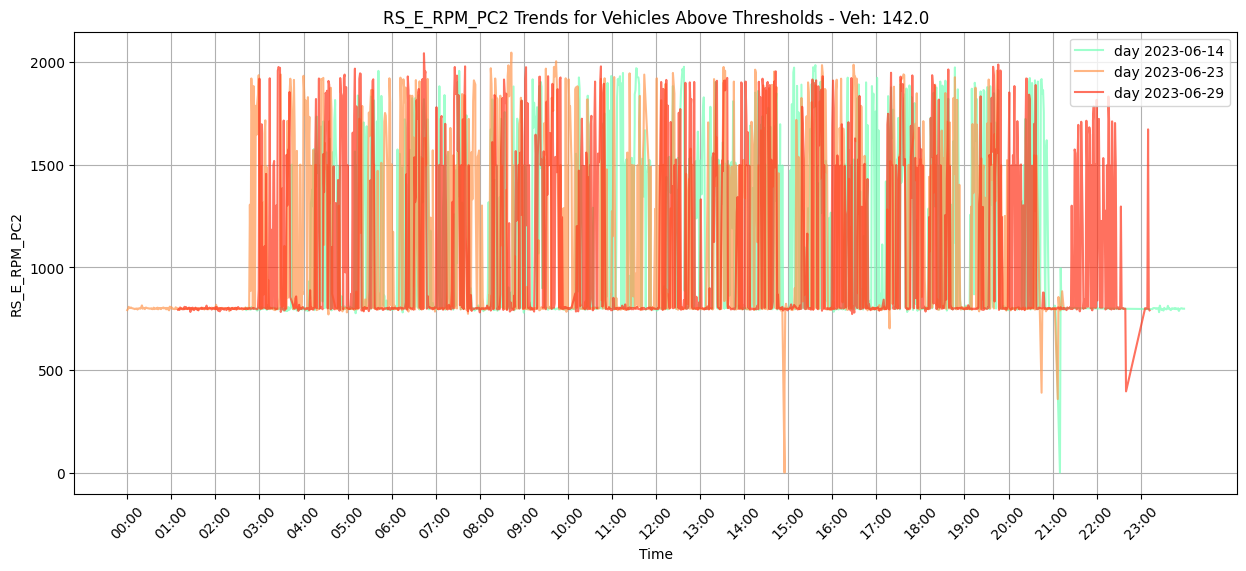

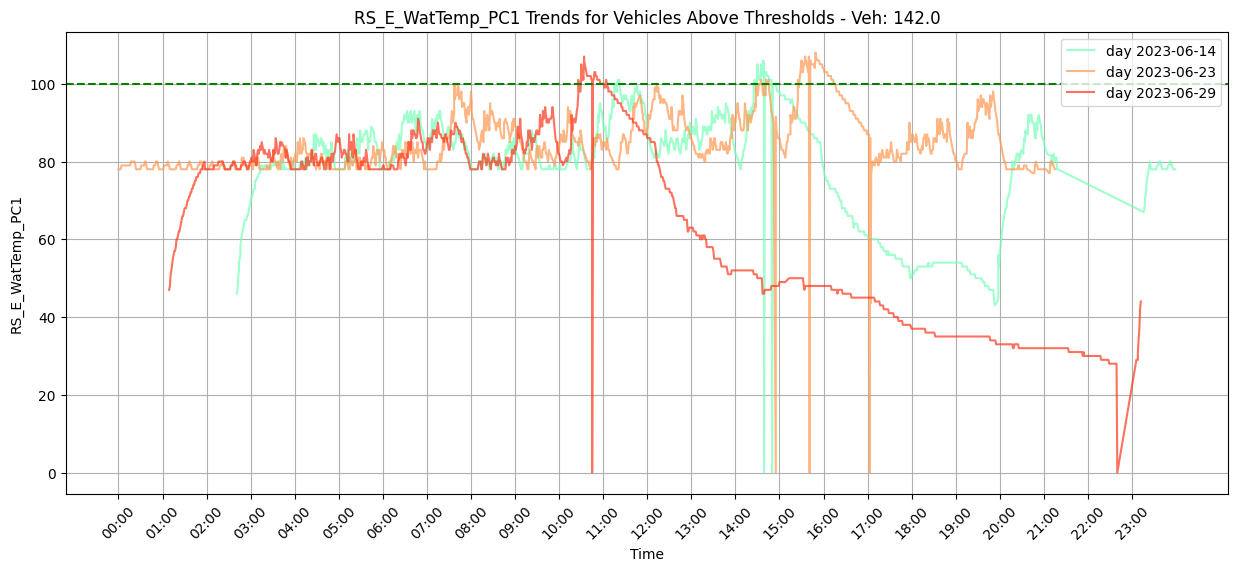

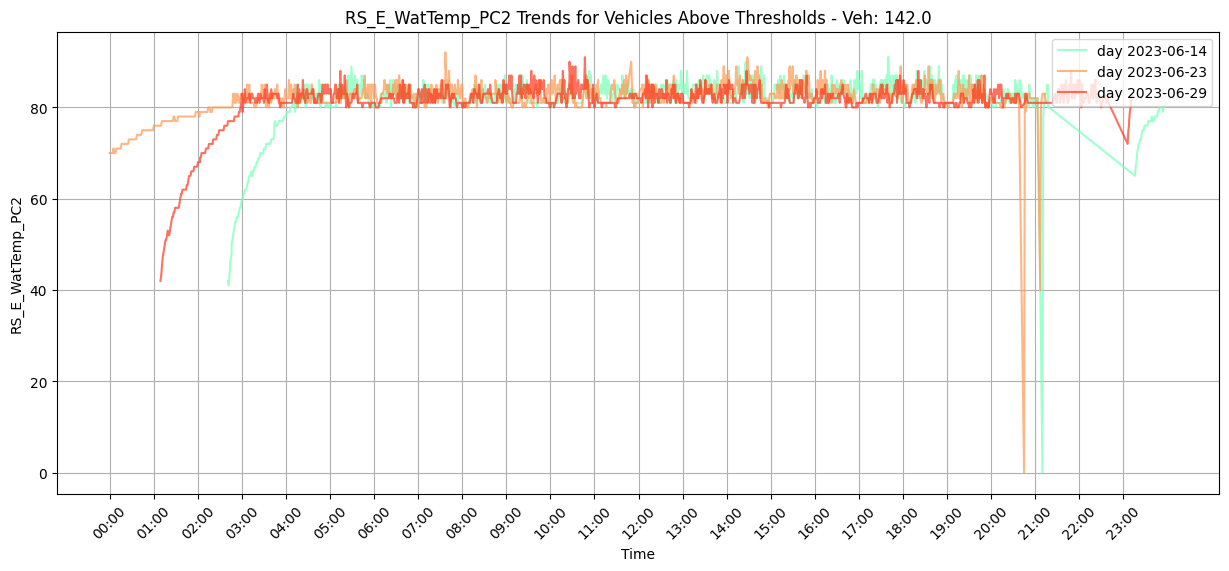

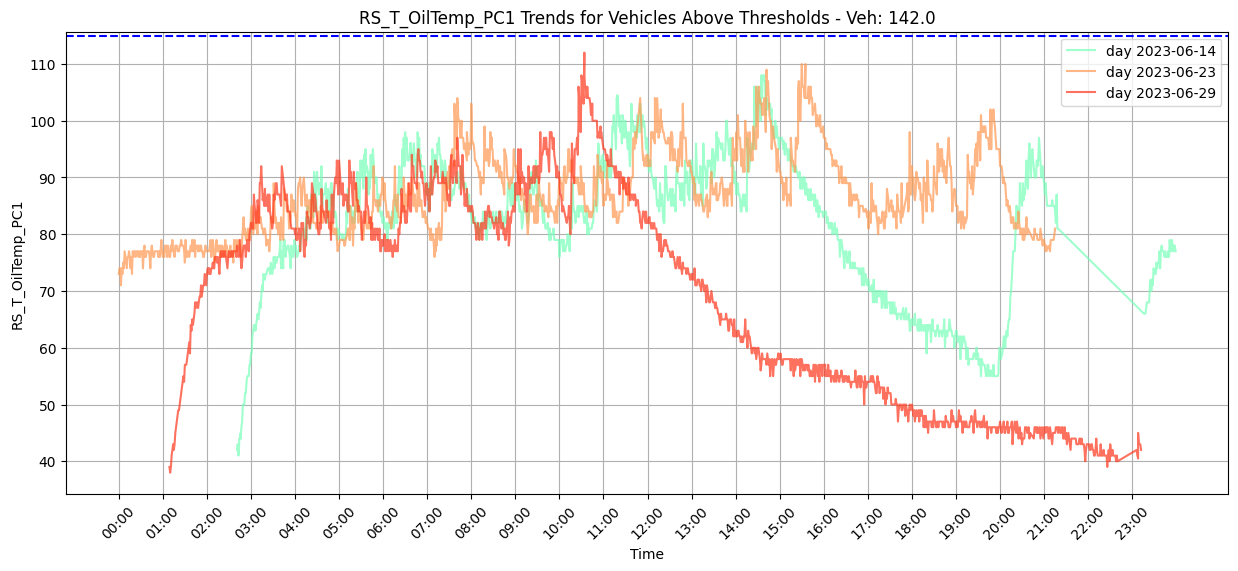

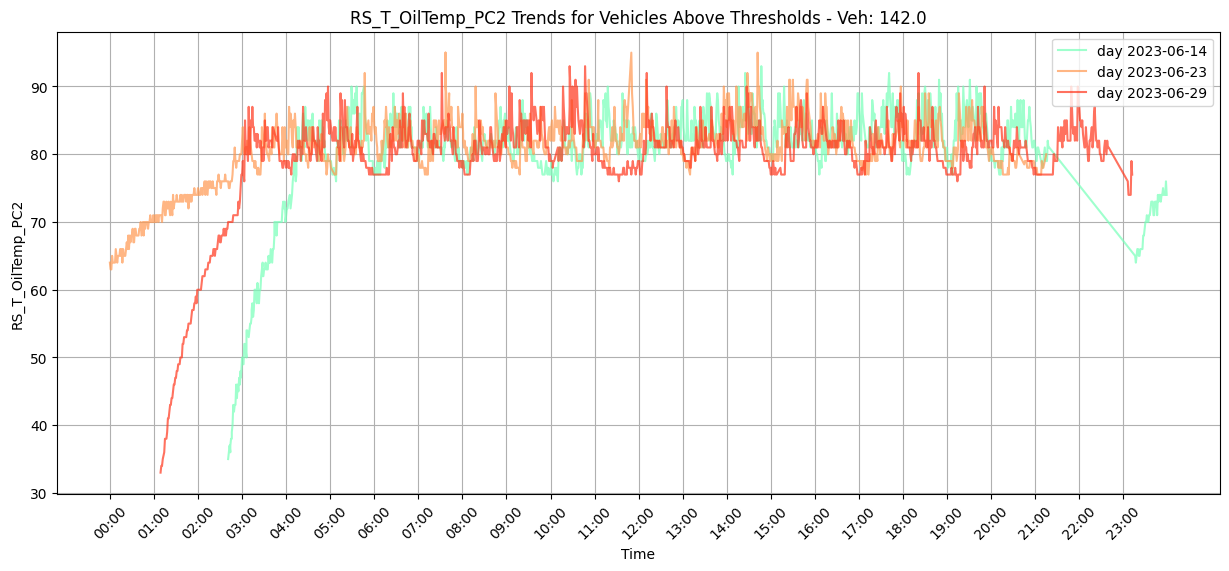

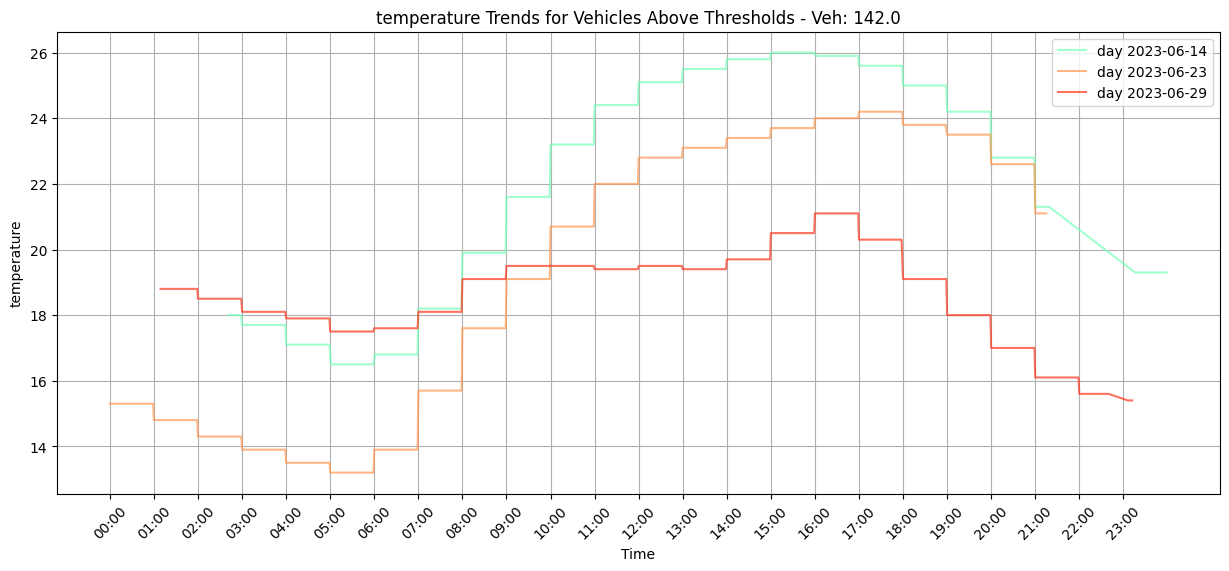

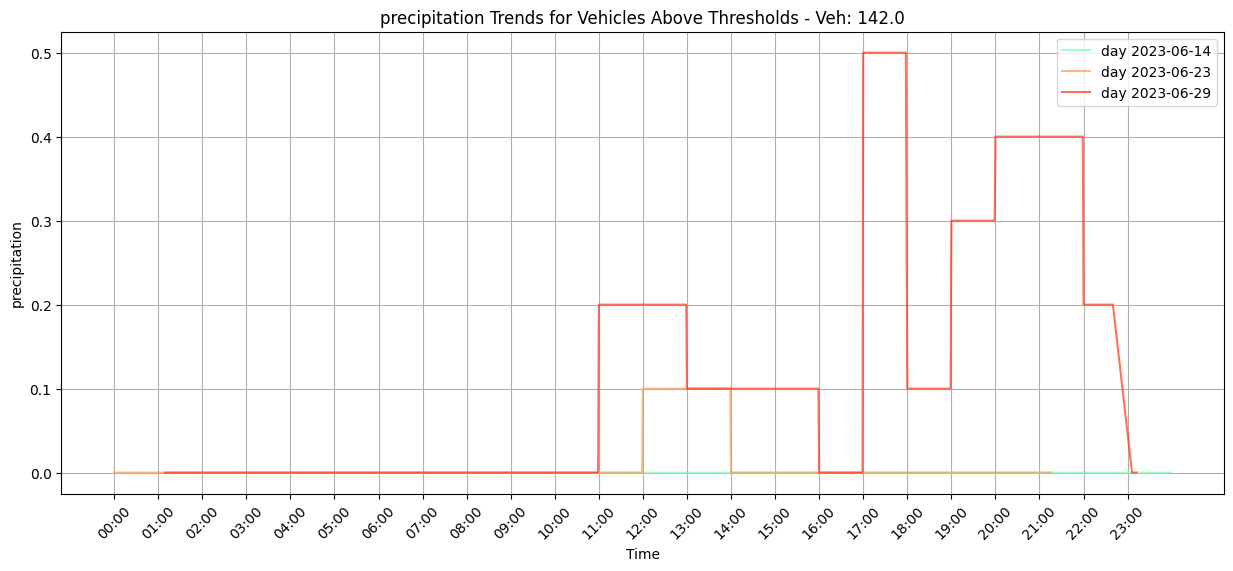

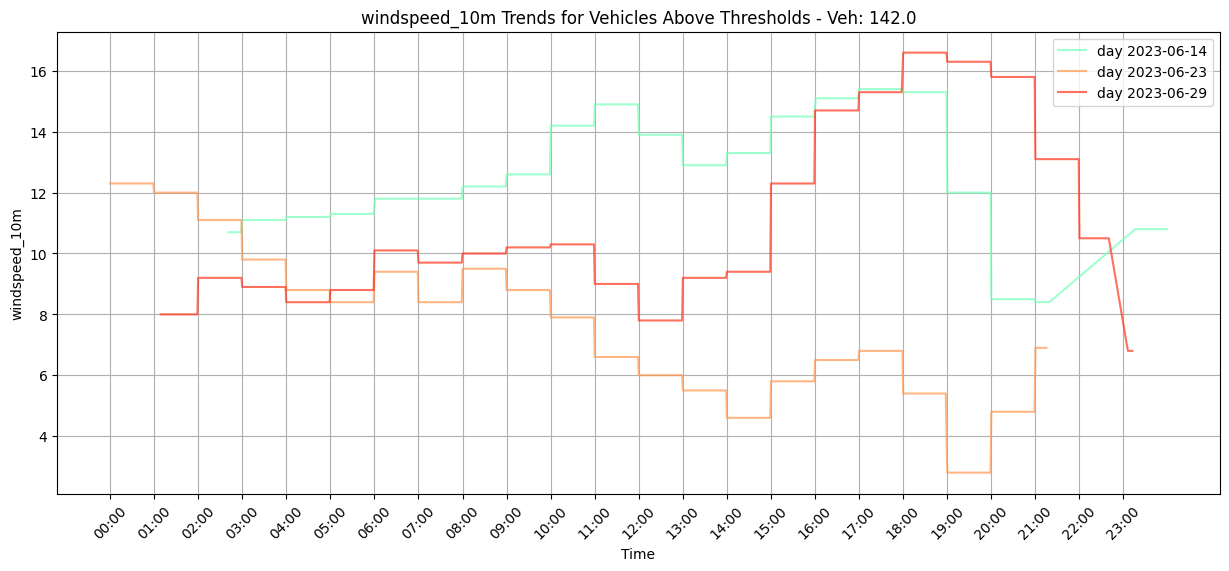

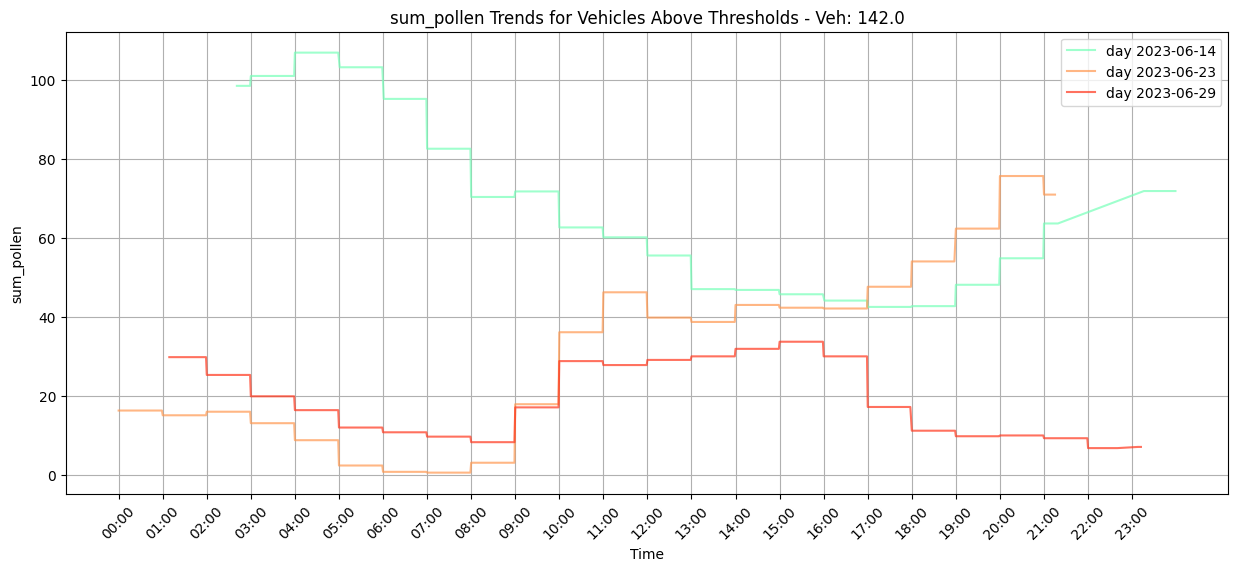

In [304]:
import pandas as pd
import random

# Assuming your dataframe is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Filter data for temperatures exceeding thresholds
air_threshold = 65
water_threshold = 100
oil_threshold = 115
threshold_features_list = ["RS_E_InAirTemp_PC1", "RS_E_WatTemp_PC1", "RS_T_OilTemp_PC1"]
threshold_features_plot_line = [
    {"y": air_threshold, "color": "r", "linestyle": "--", "label": "Air Threshold"},
    {"y": water_threshold, "color": "g", "linestyle": "--", "label": "Water Threshold"},
    {"y": oil_threshold, "color": "b", "linestyle": "--", "label": "Oil Threshold"},
]
accepted_threshold_features_plot_line_index = [
    threshold_features_list.index(feature) for feature in threshold_features_list
]


# Find vehicles that exceed all three thresholds
exceeded_thresholds = df[
    # (df["RS_E_InAirTemp_PC1"] > air_threshold)
    (df["RS_E_WatTemp_PC1"] > water_threshold)
    & (df["RS_T_OilTemp_PC1"] > oil_threshold)
]

# Select 5 vehicles that exceed all thresholds
vehicles_above_thresholds = exceeded_thresholds["mapped_veh_id"].unique()[:2]
print(vehicles_above_thresholds)
# Filter data for the selected 5 vehicles
selected_vehicles_data = df[df["mapped_veh_id"].isin(vehicles_above_thresholds)]

colors = plt.cm.plasma(np.linspace(0, 1, len(selected_vehicles_data)))

# Plotting trends for the selected vehicles

for vehicle in vehicles_above_thresholds:
    day_per_vehicle = df.loc["2023-01-01":"2023-07-31"]
    day_per_vehicle = (
        day_per_vehicle[
            (
                # (day_per_vehicle["RS_E_InAirTemp_PC1"] > air_threshold)
                (day_per_vehicle["RS_E_WatTemp_PC1"] > water_threshold)
                | (day_per_vehicle["RS_T_OilTemp_PC1"] > oil_threshold)
            )
            & (day_per_vehicle["mapped_veh_id"] == vehicle)
        ]
        .index.to_period("D")
        .unique().take([0,1,2])
    )  # get the day for vehicles that have value above threshold
    print(type(day_per_vehicle))
    print(day_per_vehicle.empty)
    if not day_per_vehicle.empty:
        for i, feature in enumerate(features_list):
            plt.figure(figsize=(15, 6))
            lines = []  # Pour stocker les lignes tracées

            # Générer des couleurs distinctes pour chaque jour
            day_colors = plt.cm.rainbow(np.linspace(0, 1, 30))
            # day_colors = plt.cm.rainbow(np.linspace(0, 1, len(day_per_vehicle)))
            for j, day in enumerate(day_per_vehicle):
                random.seed(int(j + vehicle))

                vehicle_data = df[df["mapped_veh_id"] == vehicle].loc[str(day)].sort_index()
                time_values = [
                    (t.hour * 60 + t.minute) for t in vehicle_data.index.time
                ]  # Convertir en minutes depuis minuit
                lines.append(
                    plt.plot(
                        time_values,
                        vehicle_data[feature],
                        label=f"day {day}",
                        color=day_colors[random.randint(0, 100) % 30],
                        alpha=0.7,
                    )[0]
                )

            plt.title(f"{feature} Trends for Vehicles Above Thresholds - Veh: {vehicle}")
            plt.xlabel("Time")
            plt.ylabel(f"{feature}")
            plt.grid(True)
            if feature in threshold_features_list:
                plt.axhline(**(threshold_features_plot_line[threshold_features_list.index(feature)]))
            plt.legend(handles=lines, loc="upper right")

            plt.xticks(
                range(0, 24 * 60, 60), [f"{h:02d}:00" for h in range(24)], rotation=45
            )  # Échelle horaire de 24 heures
            plt.gca().xaxis.set_major_formatter(
                plt.FuncFormatter(lambda x, _: f"{int(x // 60):02d}:{int(x % 60):02d}")
            )  # Format des ticks

            plt.show()

In [ ]:
a = df.loc["2023-05-19"]
a[a["mapped_veh_id"] == 150].sort_index()
# 50.856370	3.607628

## Correlation Analysis

### Lag Plots

C:\Users\Django\AppData\Local\Temp\ipykernel_7368\2761094783.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  sub_df = df[df["mapped_veh_id"] == 150].loc["2023-01-01":"2023-05-30"]


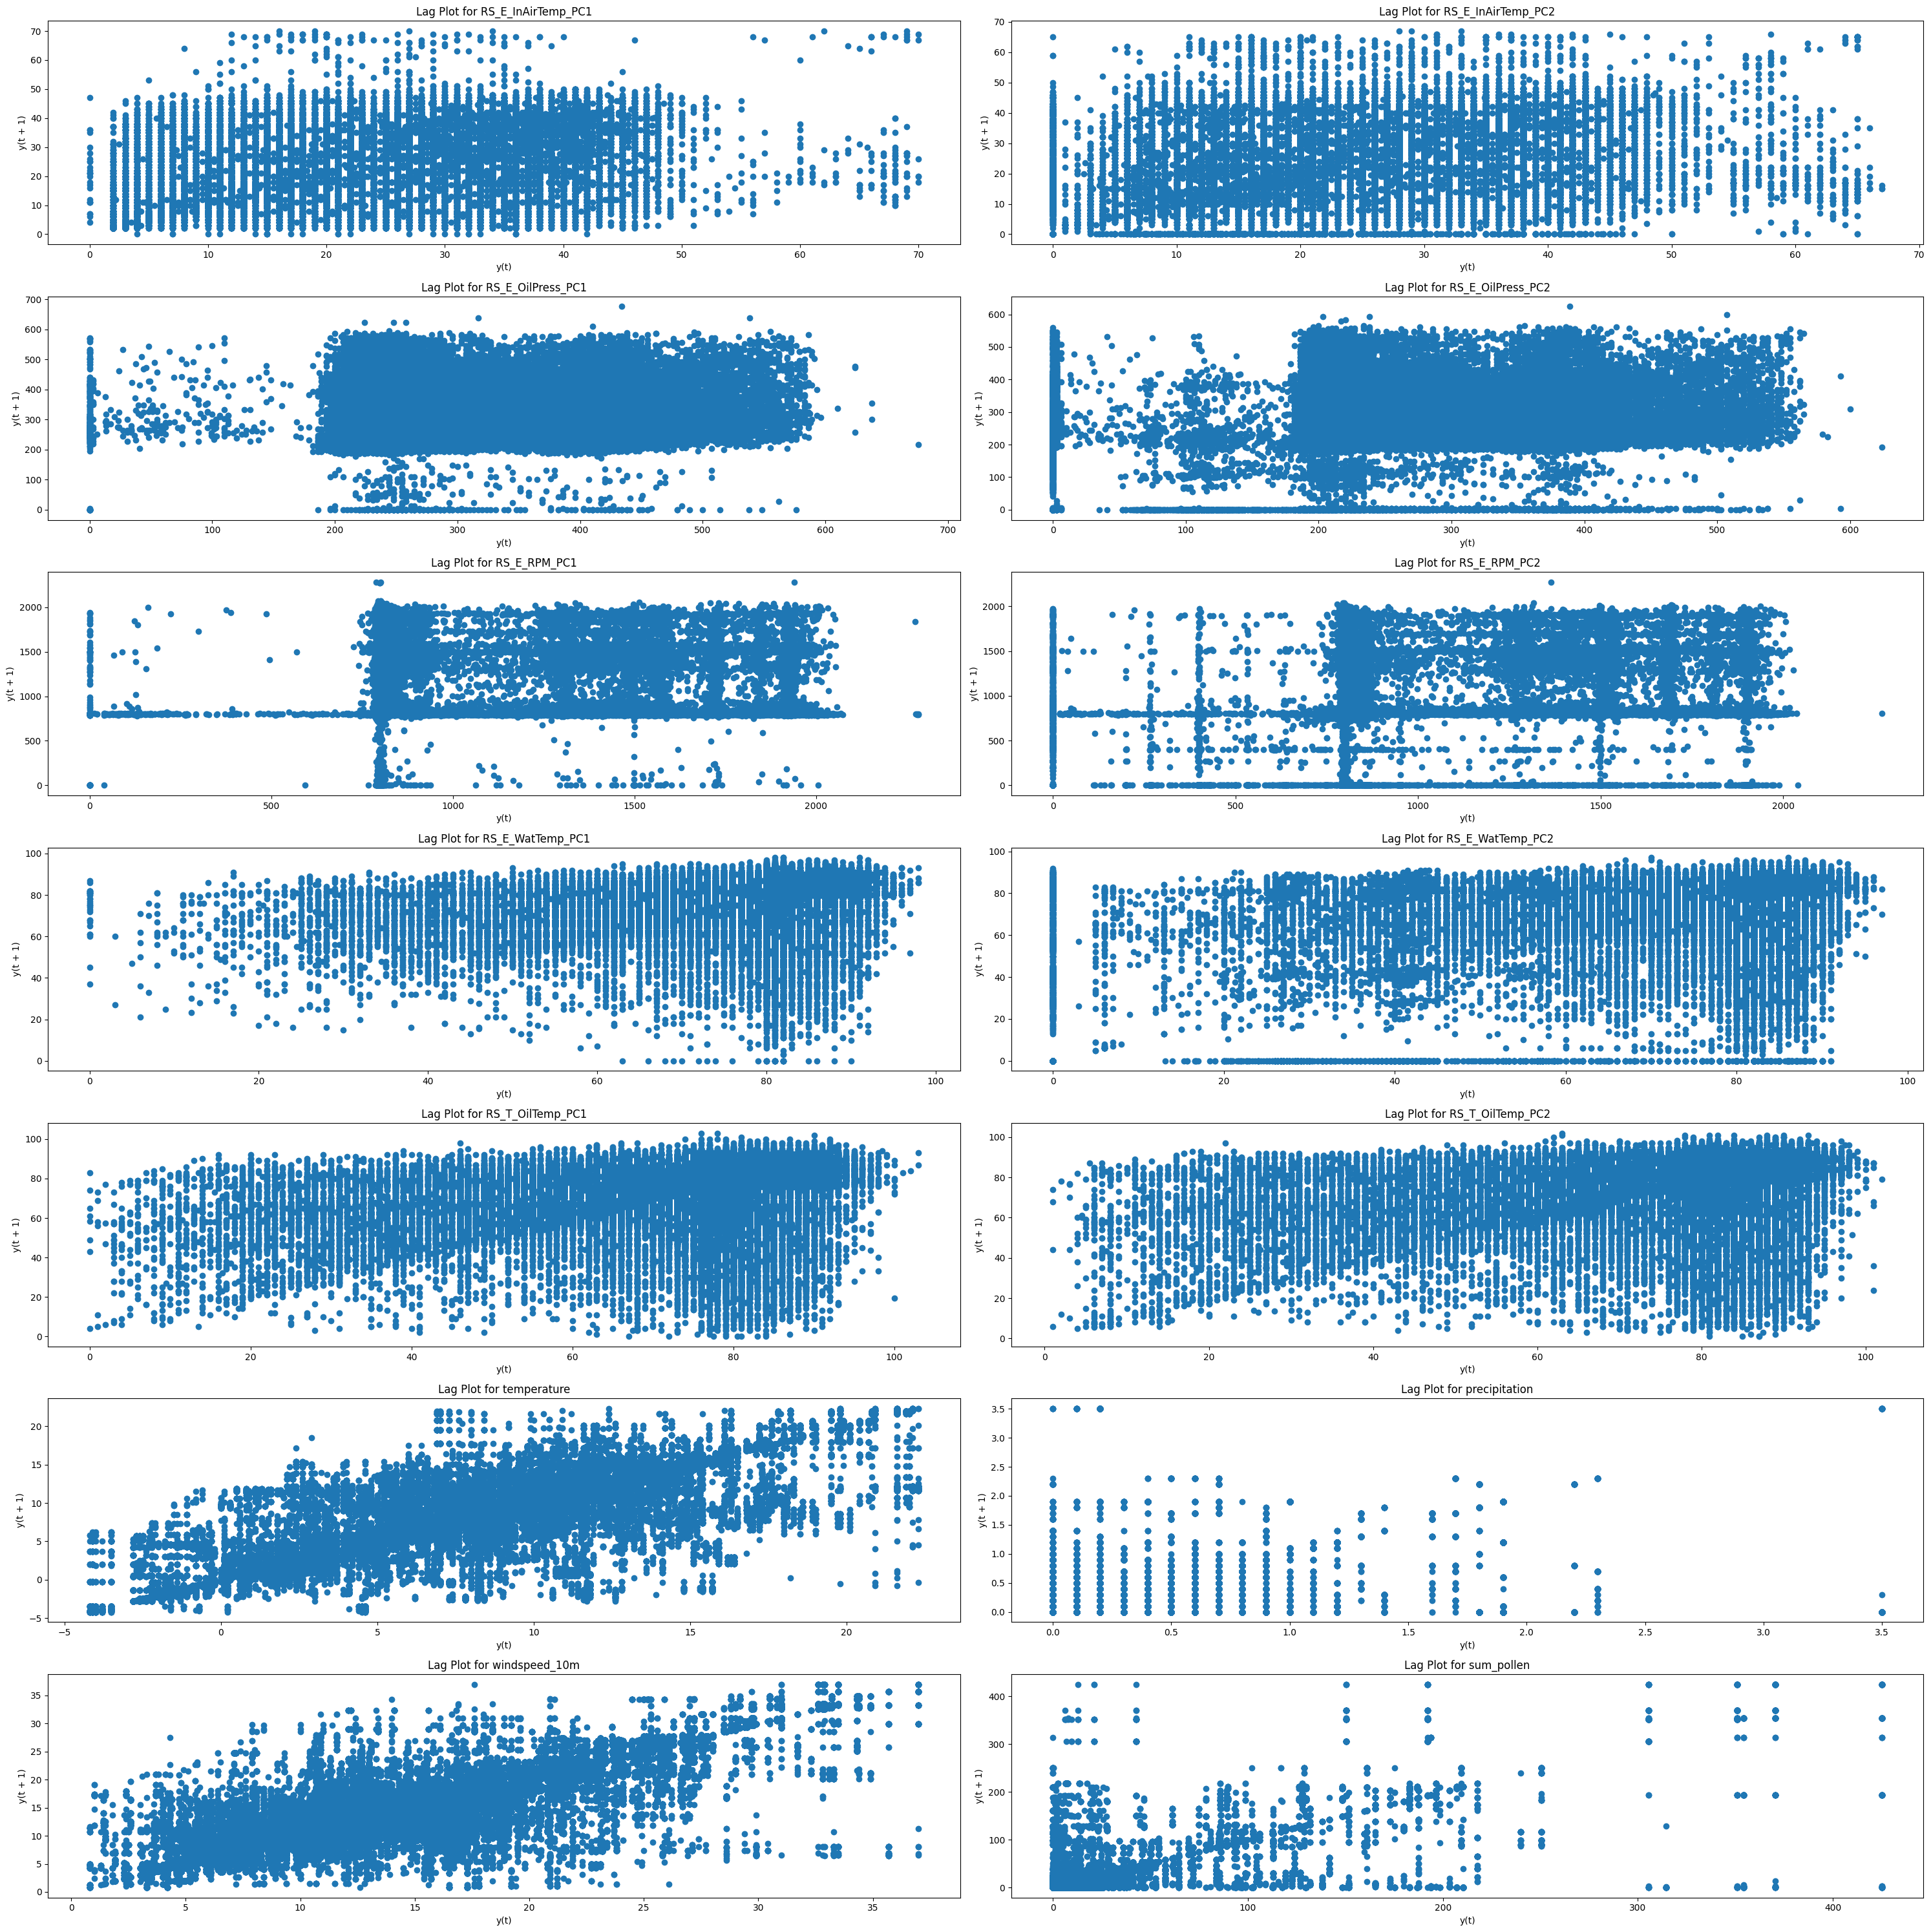

In [305]:
from pandas.plotting import lag_plot


sub_df = df[df["mapped_veh_id"] == 150].loc["2023-01-01":"2023-05-30"]
plt.figure(figsize=(30, 30))

num_cols = 2  # Number of columns in the subplot grid
num_rows = (len(features_list) + num_cols - 1) // num_cols  # Calculate the number of rows

for idx, variable in enumerate(features_list, start=1):
    plt.subplot(num_rows, num_cols, idx)
    lag_plot(sub_df[variable])
    plt.title(f"Lag Plot for {variable}")

plt.tight_layout()
plt.show()

# Anomaly Detection Visualization

## Threshold Visualization

In [59]:
def get_days_threshold_status(df, vehicle_id, thresholds, except_days=None):
    # Filter data for the specified vehicle ID
    vehicle_data = df[df["mapped_veh_id"] == vehicle_id]

    day_within_threshold = None
    day_exceeding_threshold = None

    # Check each date for threshold exceedance
    for date in np.unique(vehicle_data.index.date):
        if except_days and str(date) in except_days:
            continue
        daily_data = vehicle_data[vehicle_data.index.date == date]

        # Flag to track if thresholds are exceeded
        threshold_exceeded = False
        threshold_exceeded_list = []
        # Check if any threshold is exceeded for the day
        for variable, threshold in thresholds.items():
            if daily_data[variable].max() > threshold:
                threshold_exceeded = True
                threshold_exceeded_list.append(True)
            else:
                threshold_exceeded_list.append(False)
        if threshold_exceeded_list.count(True) == len(thresholds):
            threshold_exceeded = True

            # break

        # Set the date based on threshold status
        if threshold_exceeded:
            # print("threshold_exceeded: ", threshold_exceeded_list)
            day_exceeding_threshold = str(date)
        else:
            # print("threshold_not_exceeded", threshold_exceeded_list)
            day_within_threshold = str(date)

    return day_within_threshold, day_exceeding_threshold


# Example usage:
vehicle_id = 191
thresholds = {"RS_E_InAirTemp_PC1": 65, "RS_E_WatTemp_PC1": 100, "RS_T_OilTemp_PC1": 115}

day_within_threshold, day_exceeding_threshold = get_days_threshold_status(df, vehicle_id, thresholds, except_days={"2023-08-25"})
print(f"Date within threshold: {day_within_threshold}")
print(f"Date exceeding threshold: {day_exceeding_threshold}")

Date within threshold: 2023-09-13
Date exceeding threshold: 2023-08-21


Date within threshold: 2023-09-13
Date exceeding threshold: 2023-08-21


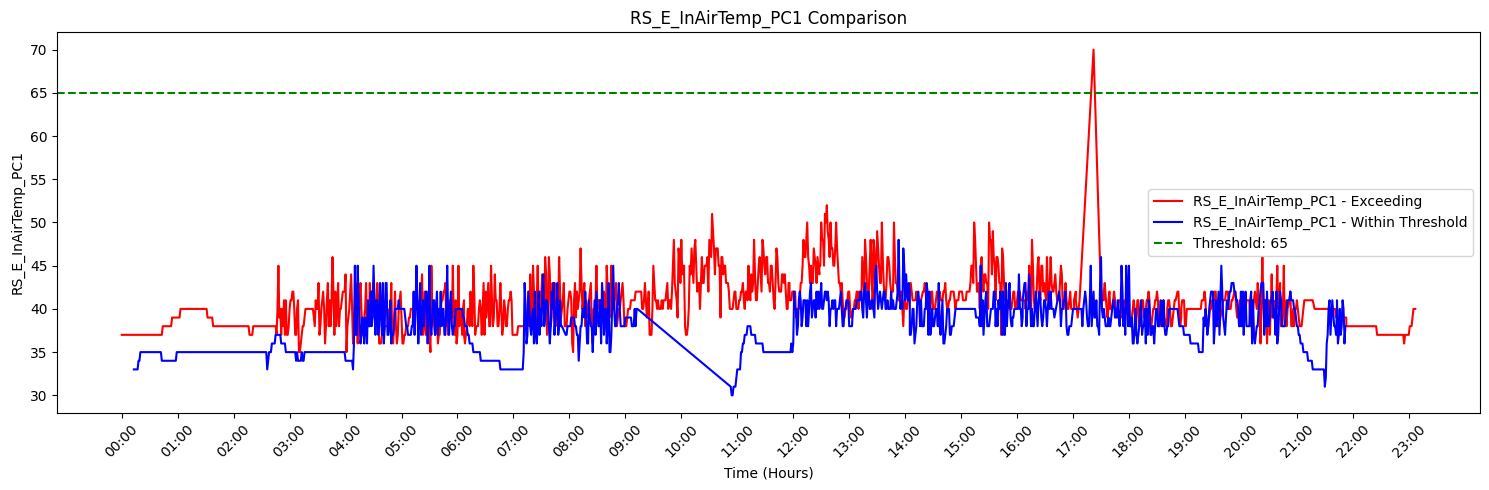

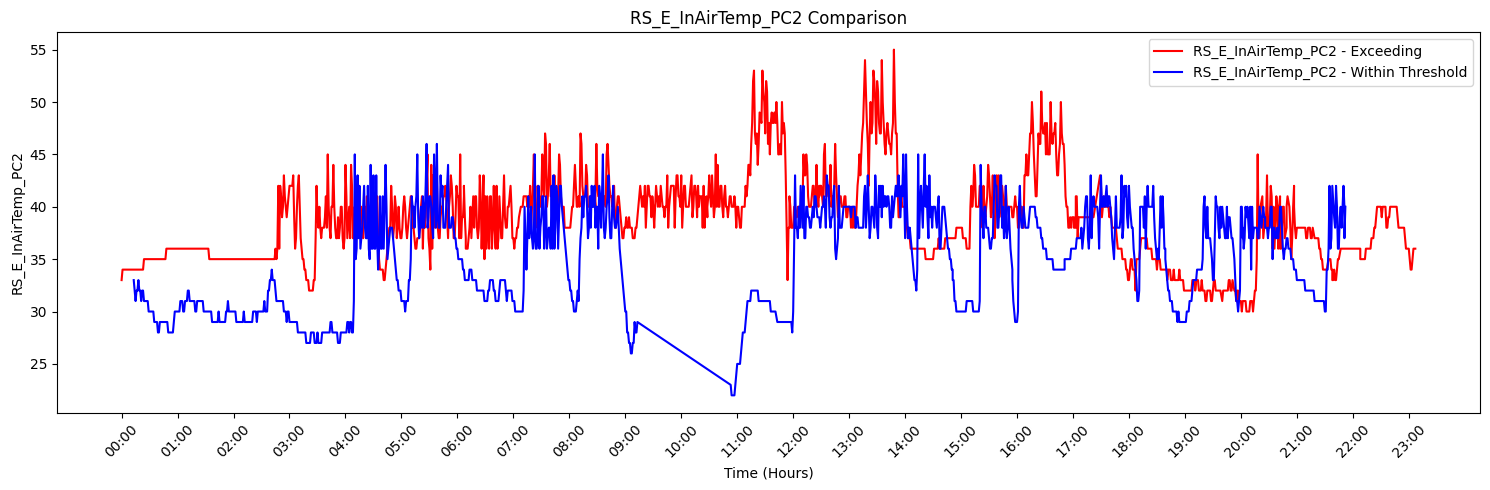

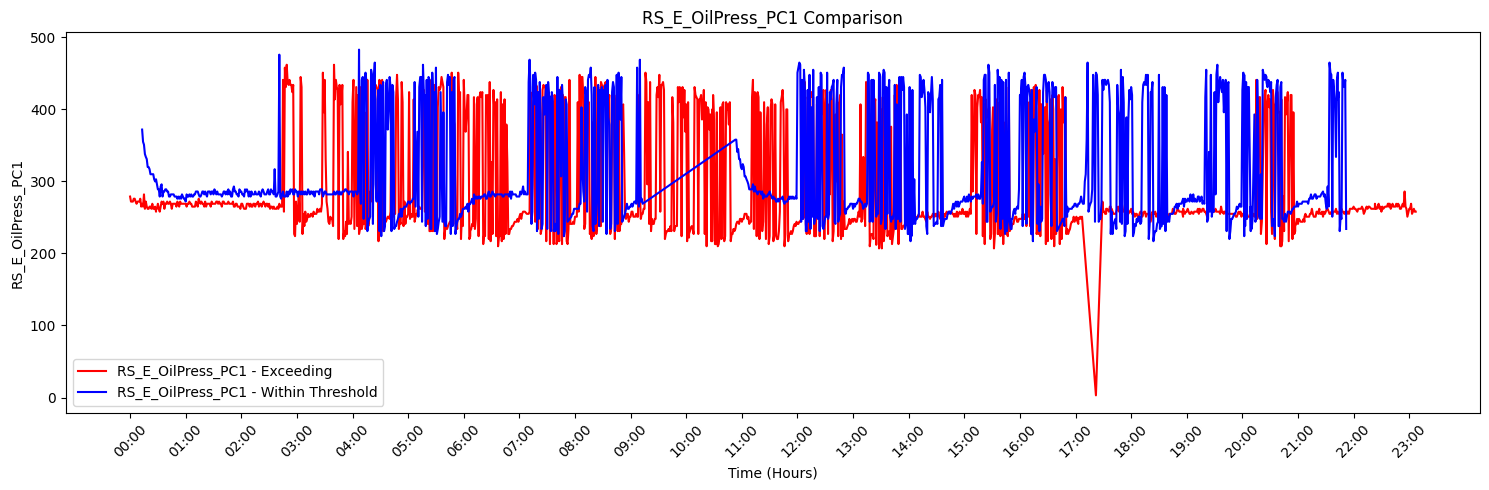

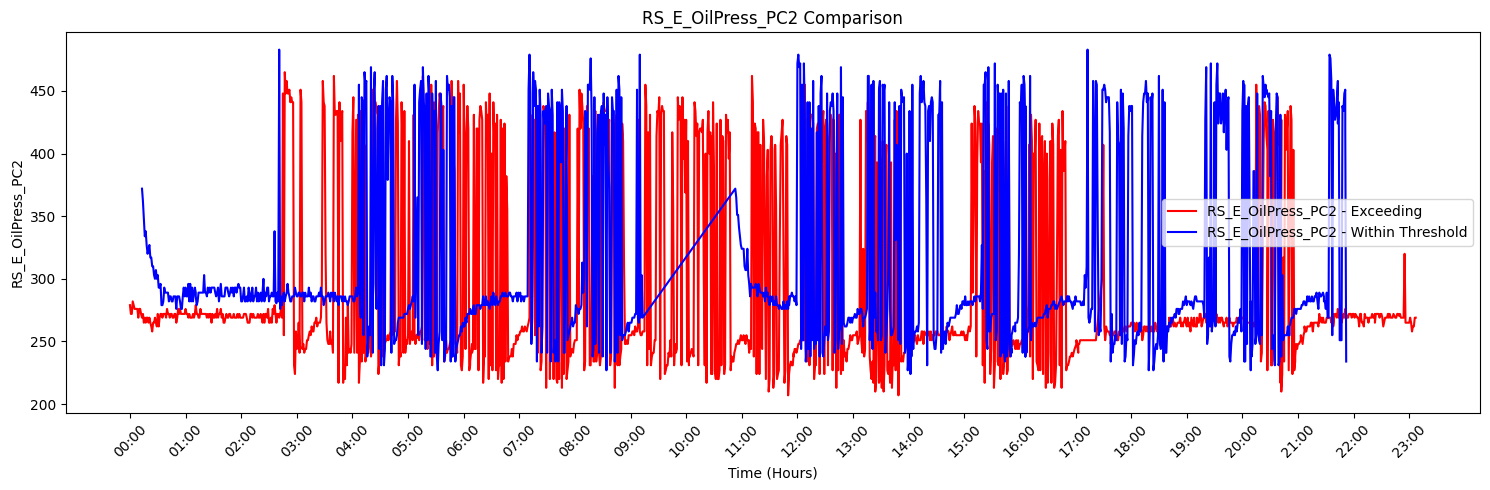

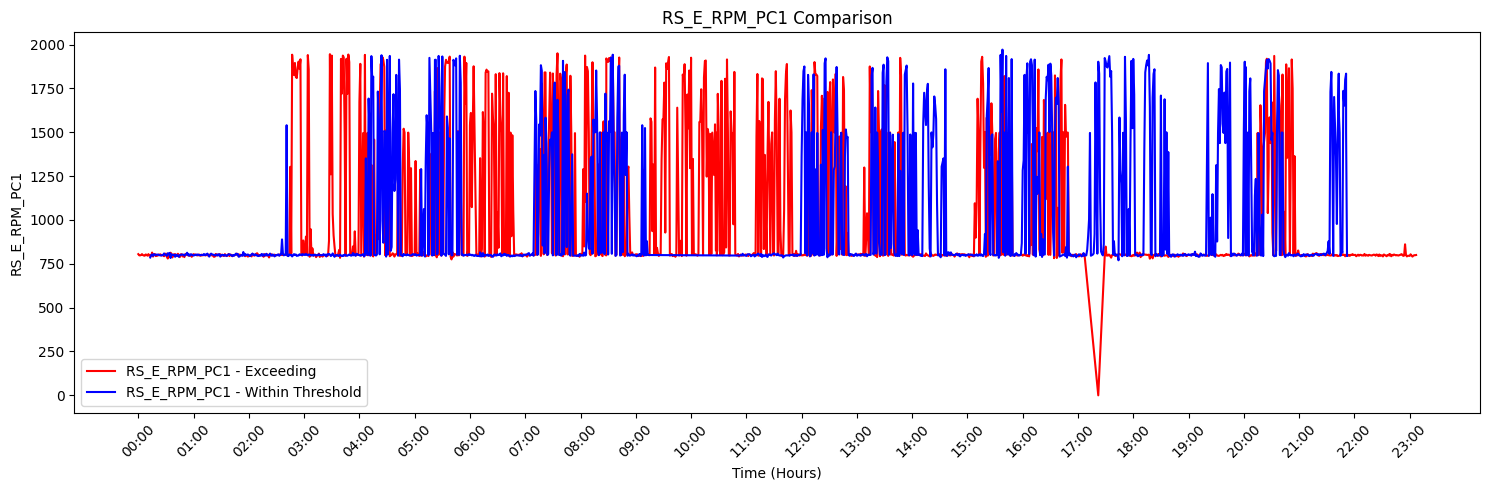

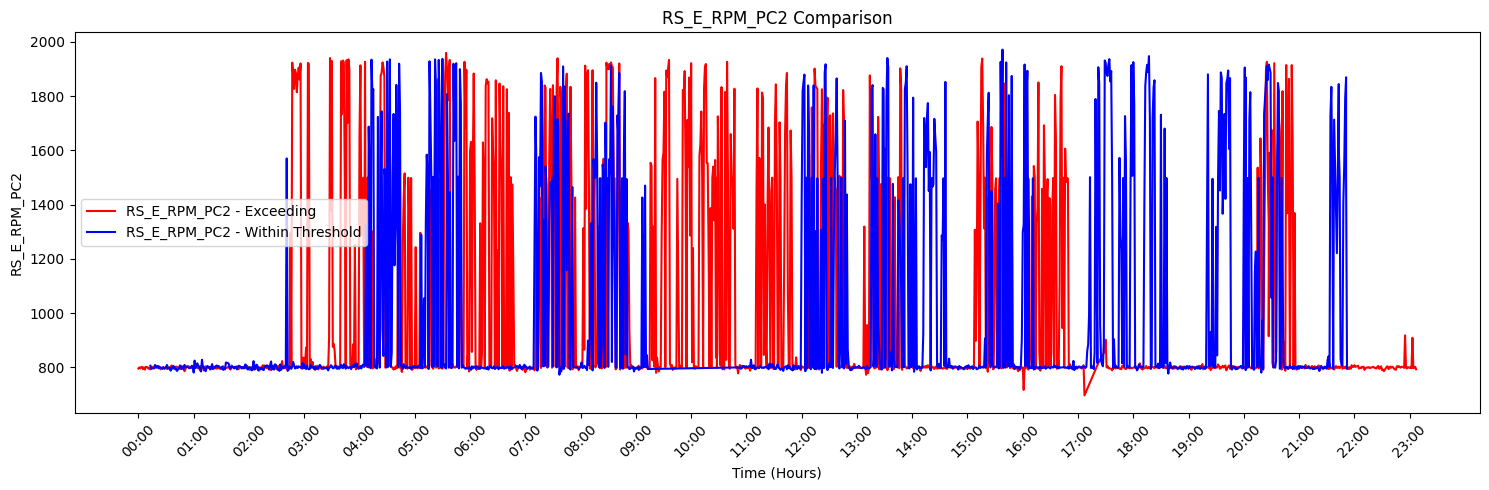

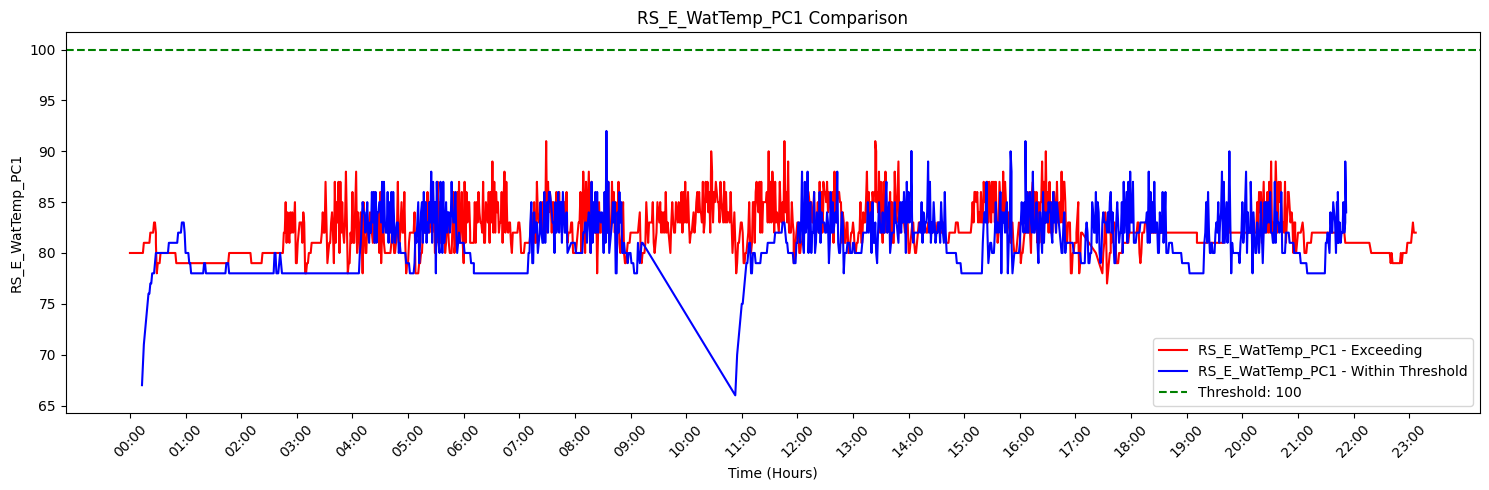

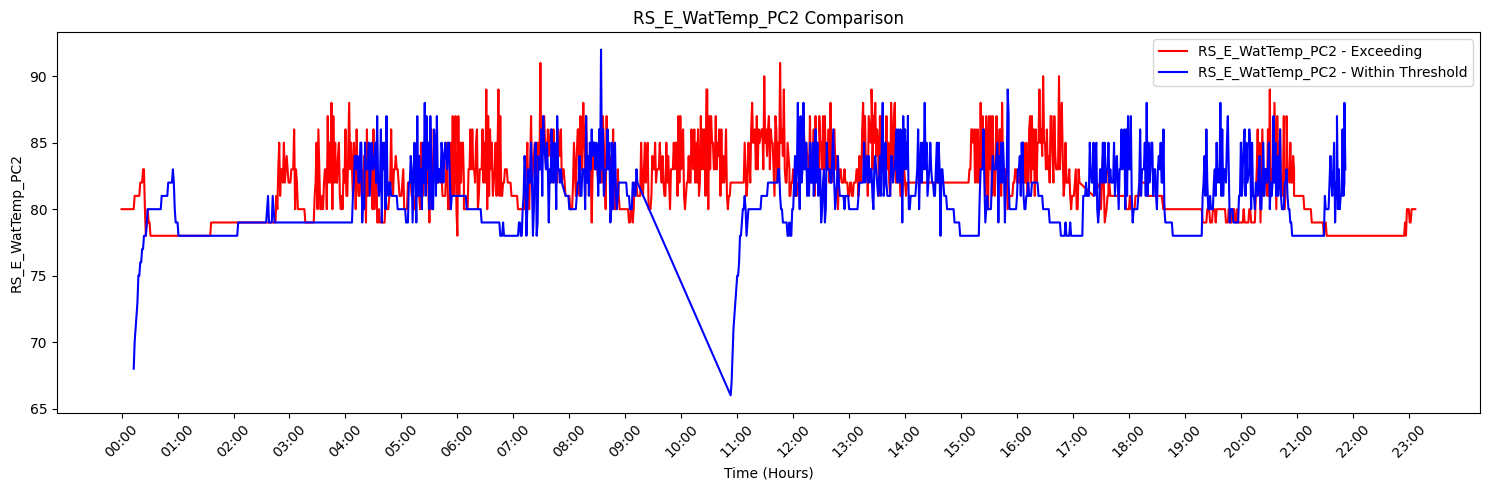

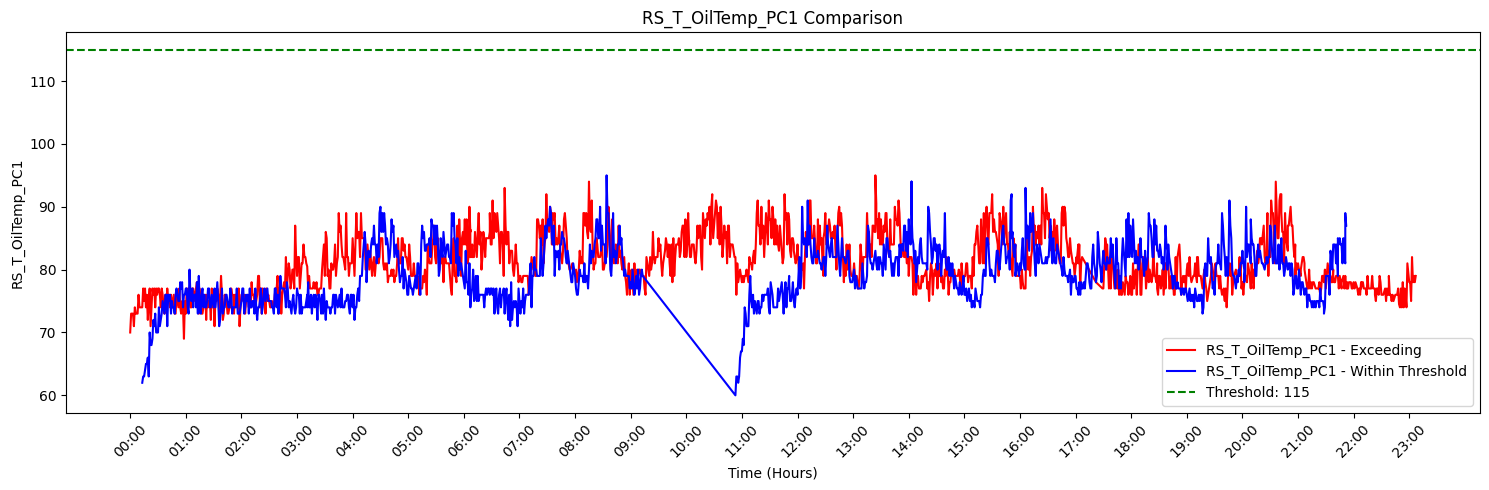

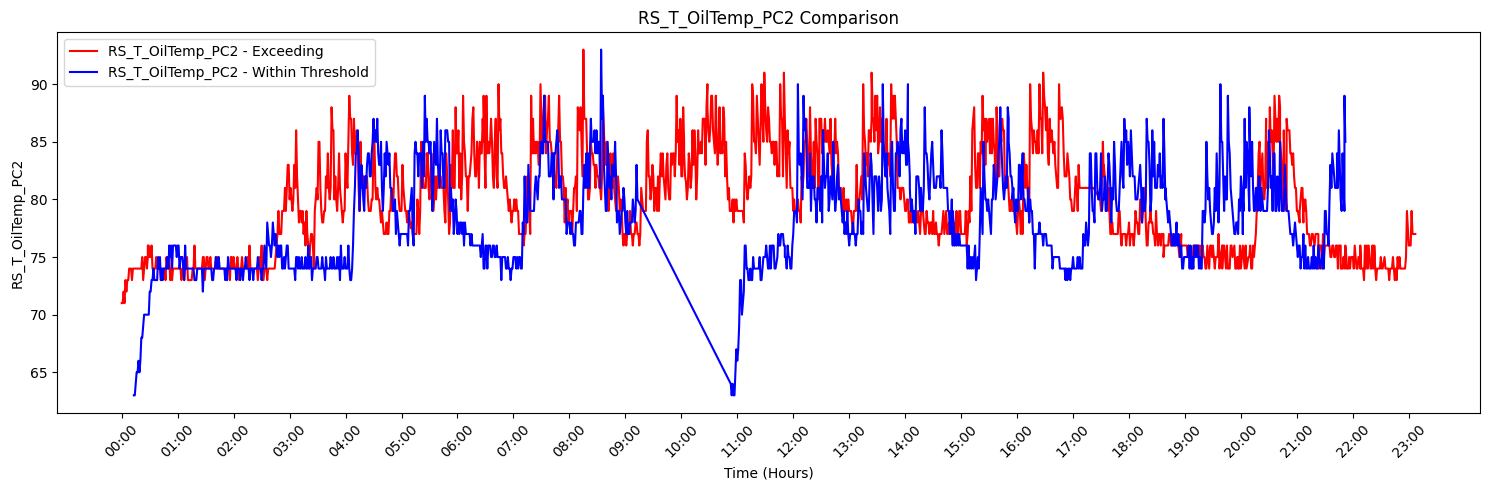

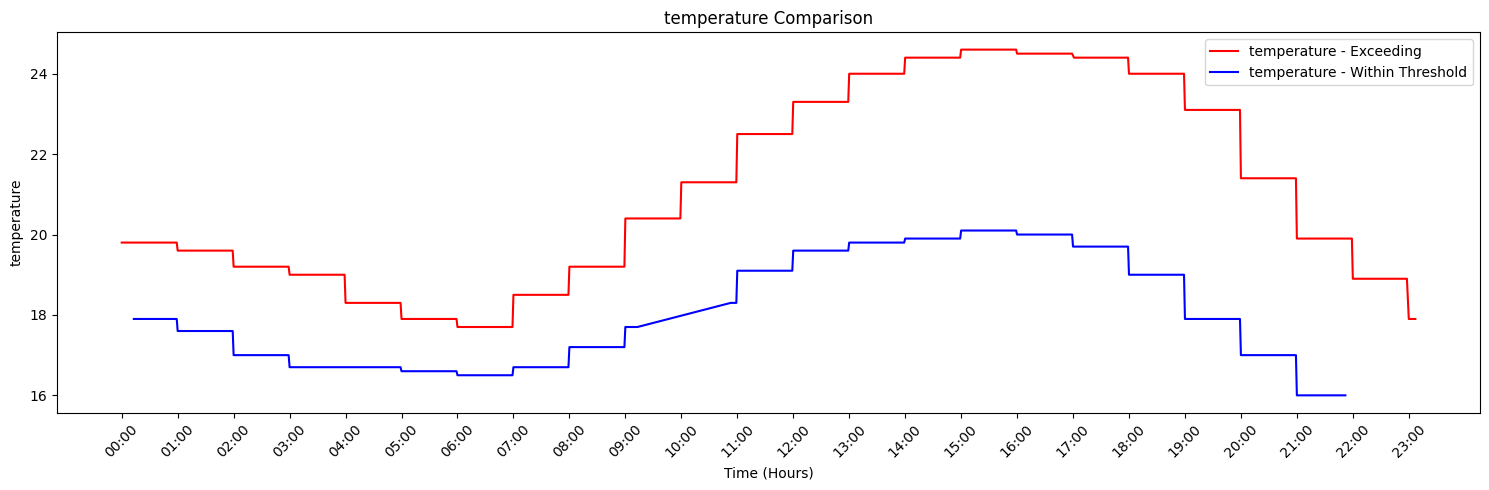

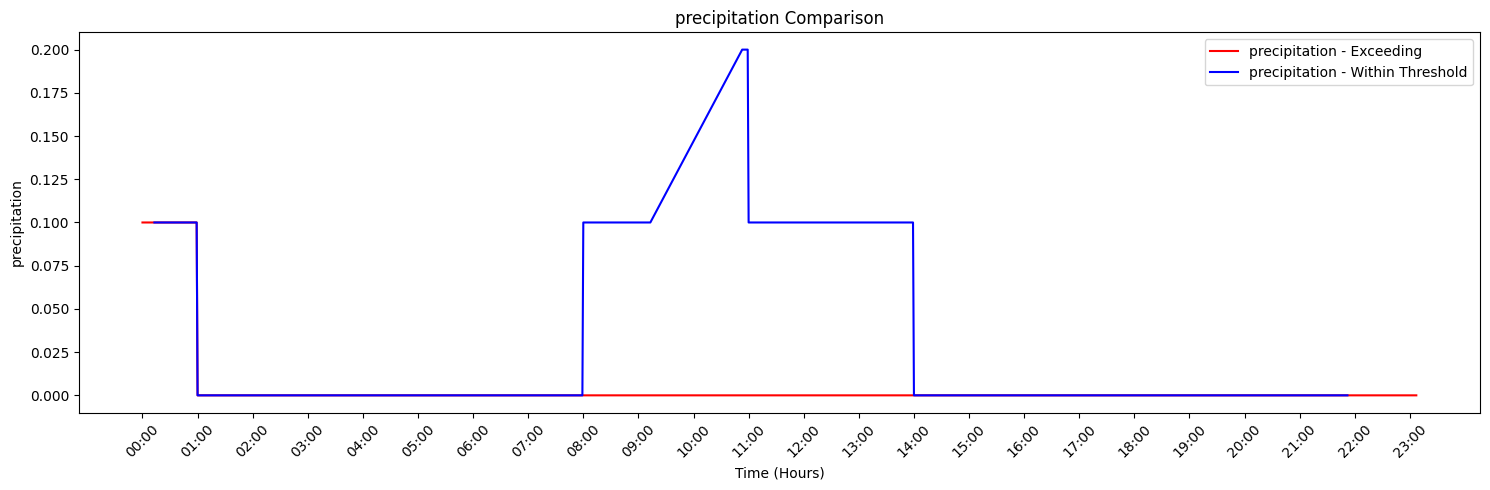

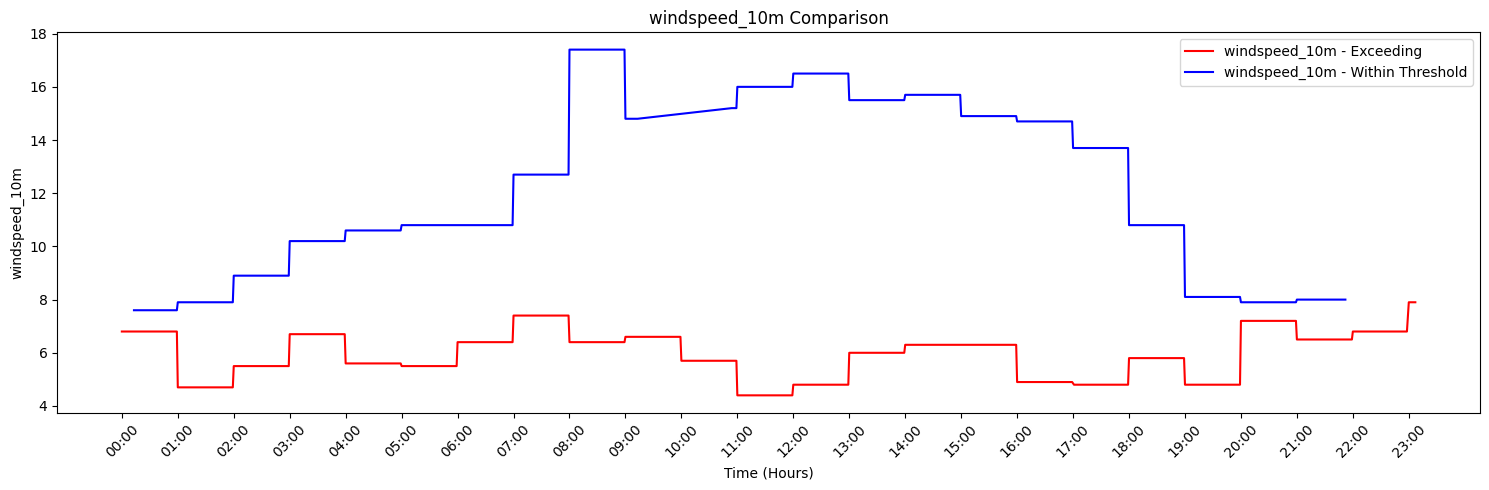

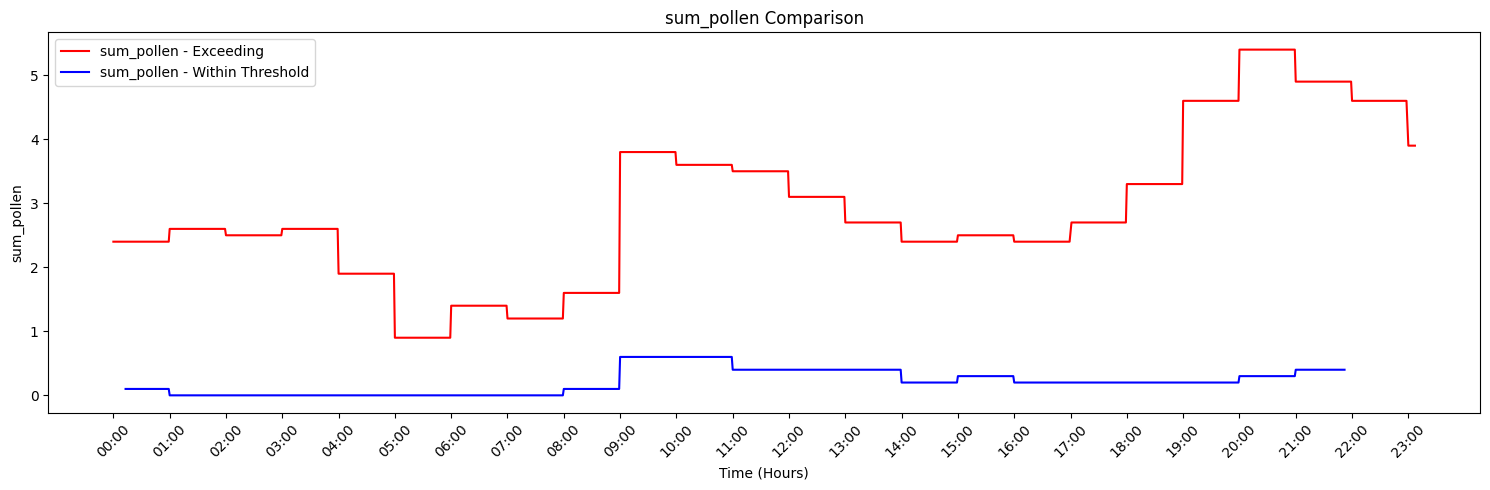

In [54]:
# Thresholds
thresholds = {"RS_E_InAirTemp_PC1": 65,
              "RS_E_WatTemp_PC1": 100, "RS_T_OilTemp_PC1": 115}

# Selecting a specific vehicle and timeframe for demonstration
vehicle_id = 191
except_days = {
    "2023-08-25",
}

date_within_threshold, date_exceeding = get_days_threshold_status(
    df, vehicle_id=vehicle_id, thresholds=thresholds, except_days=except_days)
print(f"Date within threshold: {date_within_threshold}")
print(f"Date exceeding threshold: {date_exceeding}")

sub_df_exceeding = df[(df["mapped_veh_id"] == vehicle_id) & (
    df.index.date == pd.to_datetime(date_exceeding).date())].sort_index()
sub_df_within_threshold = df[(df["mapped_veh_id"] == vehicle_id) & (
    df.index.date == pd.to_datetime(date_within_threshold).date())].sort_index()


for idx, variable in enumerate(features_list, start=1):
    plt.figure(figsize=(15, 5))
    # Plot for the day exceeding the threshold
    time_values_exceeding = [(t.hour * 60 + t.minute)
                             for t in sub_df_exceeding.index.time]
    plt.plot(time_values_exceeding,
             sub_df_exceeding[variable], label=f"{variable} - Exceeding", color="red")

    # Plot for the day within the threshold
    time_values_within_threshold = [
        (t.hour * 60 + t.minute) for t in sub_df_within_threshold.index.time]
    plt.plot(time_values_within_threshold,
             sub_df_within_threshold[variable], label=f"{variable} - Within Threshold", color="blue")

    # Threshold lines
    if variable in thresholds:
        threshold = thresholds[variable]
        plt.axhline(y=threshold, color="green", linestyle="--",
                    label=f"Threshold: {threshold}")

    plt.title(f"{variable} Comparison")
    plt.xlabel("Time (Hours)")
    plt.ylabel(variable)
    plt.legend()

    # Convert x-axis to hours for comparison between days
    # Échelle horaire de 24 heures
    plt.xticks(range(0, 24 * 60, 60),
               [f"{h:02d}:00" for h in range(24)], rotation=45)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(
        lambda x, _: f"{int(x // 60):02d}:{int(x % 60):02d}"))  # Format des ticks

    # plt.xticks(range(0, len(sub_df_exceeding.index), len(sub_df_exceeding.index) // 6), range(0, 24, 4))  # Adjust ticks for 24 hours

    plt.tight_layout()
    plt.show()

Date within threshold: 2023-09-13
Date exceeding threshold: 2023-08-25
